In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import seaborn as sns
from scipy.special import expit
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score,roc_curve, auc, accuracy_score, precision_score, confusion_matrix, recall_score
from matplotlib.legend_handler import HandlerLine2D

## Data Preprocessing

In [ ]:
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
url = "https://raw.githubusercontent.com/JinyinChai/CS6620_Orchid/main/arabica_data_cleaned.csv"
df = pd.read_csv(url, header=None)
new_header = df.iloc[0]
df = df[1:-1]
df.columns = new_header
df

0        NaN  Species                       Owner Country.of.Origin  \
1        1.0  Arabica                   metad plc          Ethiopia   
2        2.0  Arabica                   metad plc          Ethiopia   
3        3.0  Arabica    grounds for health admin         Guatemala   
4        4.0  Arabica         yidnekachew dabessa          Ethiopia   
5        5.0  Arabica                   metad plc          Ethiopia   
...      ...      ...                         ...               ...   
1306  1306.0  Arabica                     cadexsa          Honduras   
1307  1307.0  Arabica    juan carlos garcia lopez            Mexico   
1308  1308.0  Arabica     myriam kaplan-pasternak             Haiti   
1309  1309.0  Arabica  exportadora atlantic, s.a.         Nicaragua   
1310  1310.0  Arabica   juan luis alvarado romero         Guatemala   

0                                    Farm.Name                  Lot.Number  \
1                                    metad plc                         NaN   
2                                    metad plc                         NaN   
3     san marcos barrancas "san cristobal cuch                         NaN   
4        yidnekachew dabessa coffee plantation                         NaN   
5                                    metad plc                         NaN   
...                                        ...                         ...   
1306                               cerro bueno                         NaN   
1307                             el centenario                         NaN   
1308                                 200 farms                         NaN   
1309                          finca las marías  017-053-0211/ 017-053-0212   
1310                            finca el limon                         NaN   

0                                                  Mill  \
1                                             metad plc   
2                                             metad plc   
3                                                   NaN   
4                                               wolensu   
5                                             metad plc   
...                                                 ...   
1306                                            cadexsa   
1307  la esperanza, municipio juchique de ferrer, ve...   
1308        coeb koperativ ekselsyo basen (350 members)   
1309                         beneficio atlantic condega   
1310                                   beneficio serben   

0                     ICO.Number                                Company  \
1                      2014/2015      metad agricultural developmet plc   
2                      2014/2015      metad agricultural developmet plc   
3                            NaN                                    NaN   
4                            NaN  yidnekachew debessa coffee plantation   
5                      2014/2015      metad agricultural developmet plc   
...                          ...                                    ...   
1306                   13-63-174                                cadexsa   
1307                  1104328663                              terra mia   
1308                         NaN                           haiti coffee   
1309  017-053-0211/ 017-053-0212               exportadora atlantic s.a   
1310                  11/853/165                                unicafe   

0          Altitude  ...       Color Category.Two.Defects  \
1         1950-2200  ...       Green                    0   
2         1950-2200  ...       Green                    1   
3     1600 - 1800 m  ...         NaN                    0   
4         1800-2200  ...       Green                    2   
5         1950-2200  ...       Green                    2   
...             ...  ...         ...                  ...   
1306      1450 msnm  ...       Green                    4   
1307            900  ...        None                   20   
1308          ~350m  ...  Blue-Green               

In [ ]:
# Choose only numeric type to do analysis
df = df[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
               'Cupper.Points', 'Moisture', 'Quakers', 'Category.One.Defects', 'Category.Two.Defects',
               'altitude_mean_meters', 'Total.Cup.Points']]
df = df.astype(float)

In [ ]:
# only use data with reasonable altitude
df = df[df['altitude_mean_meters']<8850]

In [ ]:
# fill the only null value of Quakers to 0
df['Quakers'] = df['Quakers'].fillna(0)

In [ ]:
# no NaN in dataset
df.isnull().sum()

0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Moisture                0
Quakers                 0
Category.One.Defects    0
Category.Two.Defects    0
altitude_mean_meters    0
Total.Cup.Points        0
dtype: int64

In [ ]:
#add col_names to dataset for convience
col_names = df.columns.tolist()
feature_names = col_names[:-1]
target_name = col_names[-1]
print("Features:\n", feature_names)
print("Target:\n", target_name)

Features:
 ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Moisture', 'Quakers', 'Category.One.Defects', 'Category.Two.Defects', 'altitude_mean_meters']
Target:
 Total.Cup.Points


## Data Description and Visualization

In [ ]:
df.describe(include='all')

0            Aroma       Flavor   Aftertaste      Acidity         Body  \
count  1079.000000  1079.000000  1079.000000  1079.000000  1079.000000   
mean      7.574393     7.523892     7.396052     7.531835     7.510843   
std       0.309508     0.332772     0.340270     0.314308     0.279941   
min       5.080000     6.170000     6.170000     5.250000     6.330000   
25%       7.420000     7.330000     7.210000     7.330000     7.330000   
50%       7.580000     7.500000     7.420000     7.500000     7.500000   
75%       7.750000     7.750000     7.580000     7.750000     7.670000   
max       8.750000     8.830000     8.670000     8.750000     8.580000   

0          Balance   Uniformity    Clean.Cup    Sweetness  Cupper.Points  \
count  1079.000000  1079.000000  1079.000000  1079.000000    1079.000000   
mean      7.511316     9.875329     9.857813     9.932567       7.489407   
std       0.349267     0.433007     0.734064     0.412244       0.413414   
min       6.080000     6.000000     0.000000     1.330000       5.170000   
25%       7.330000    10.000000    10.000000    10.000000       7.250000   
50%       7.500000    10.000000    10.000000    10.000000       7.500000   
75%       7.750000    10.000000    10.000000    10.000000       7.750000   
max       8.750000    10.000000    10.000000    10.000000      10.000000   

0         Moisture      Quakers  Category.One.Defects  Category.Two.Defects  \
count  1079.000000  1079.000000           1079.000000           1079.000000   
mean      0.092576     0.139018              0.377201              3.572753   
std       0.045046     0.724055              1.872930              5.308833   
min       0.000000     0.000000              0.000000              0.000000   
25%       0.100000     0.000000              0.000000              0.000000   
50%       0.110000     0.000000              0.000000              2.000000   
75%       0.120000     0.000000              0.000000              4.000000   
max       0.200000    11.000000             31.000000             47.000000   

0      altitude_mean_meters  Total.Cup.Points  
count           1079.000000       1079.000000  
mean            1326.543906         82.203698  
std              476.130163          2.645706  
min                1.000000         59.830000  
25%             1100.000000         81.250000  
50%             1310.640000         82.500000  
75%             1600.000000         83.670000  
max             4287.000000         90.580000

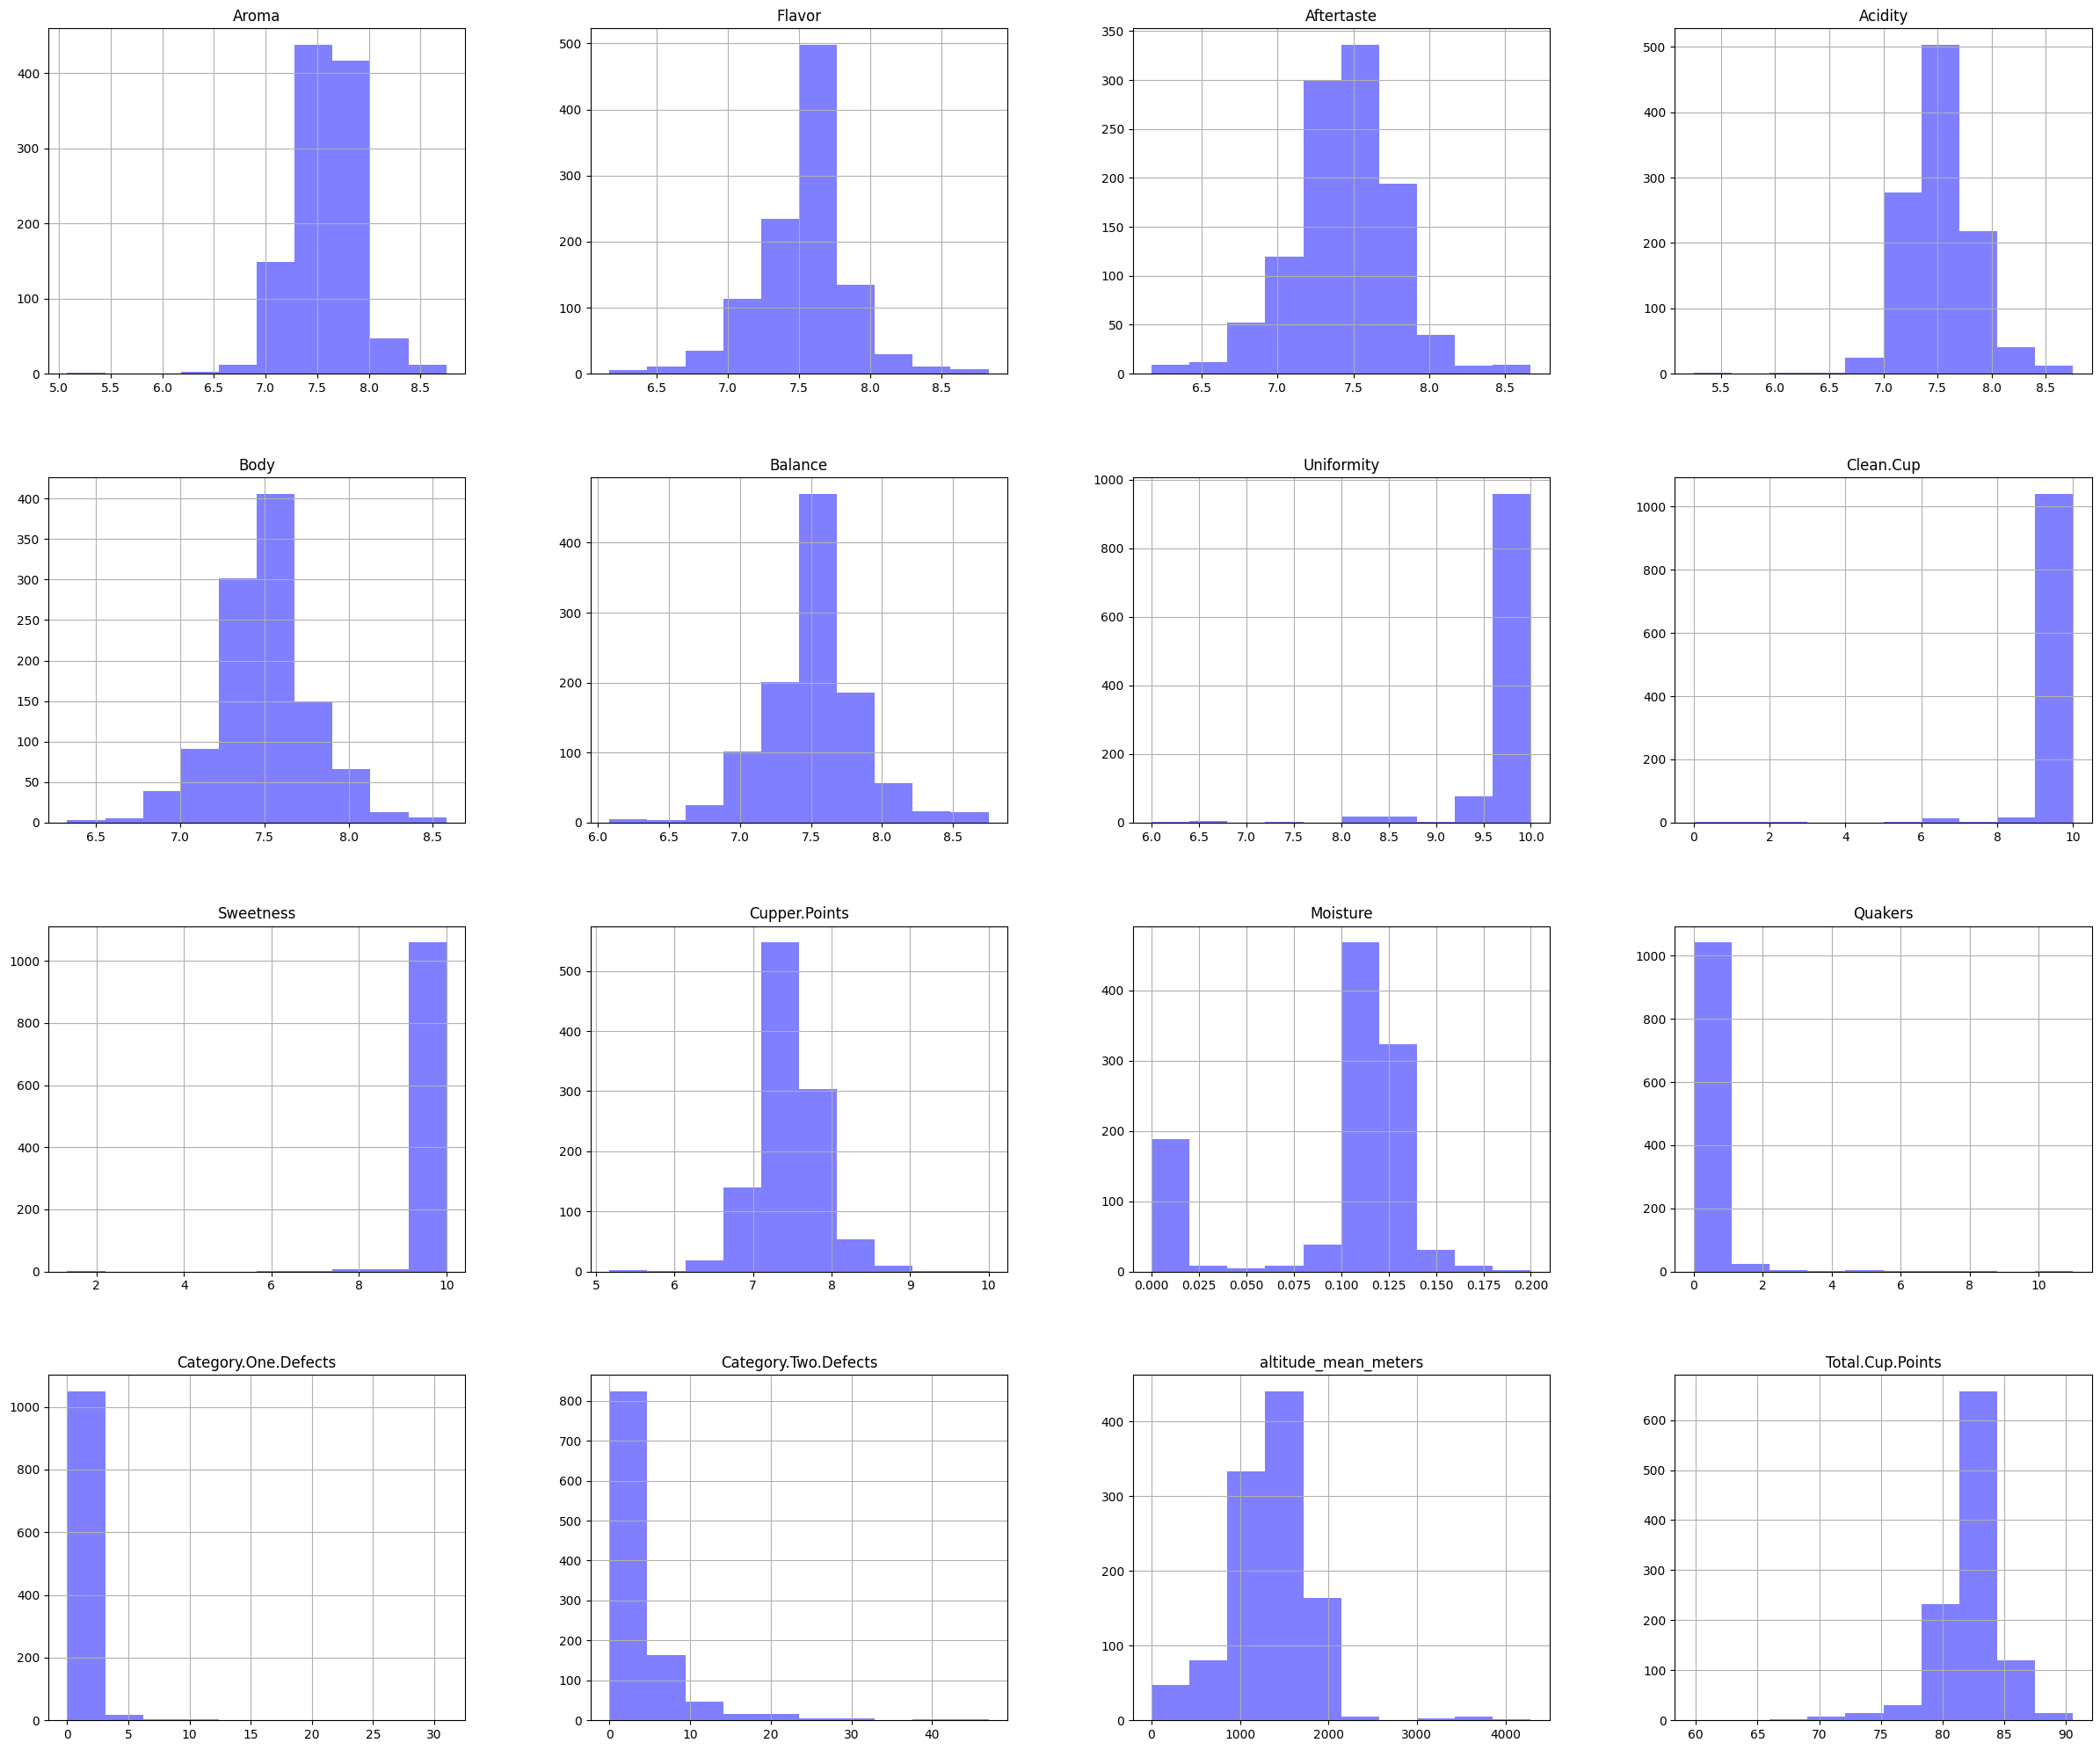

In [ ]:
df_hist = df.hist(color='b', alpha=0.5, figsize=(30, 25))

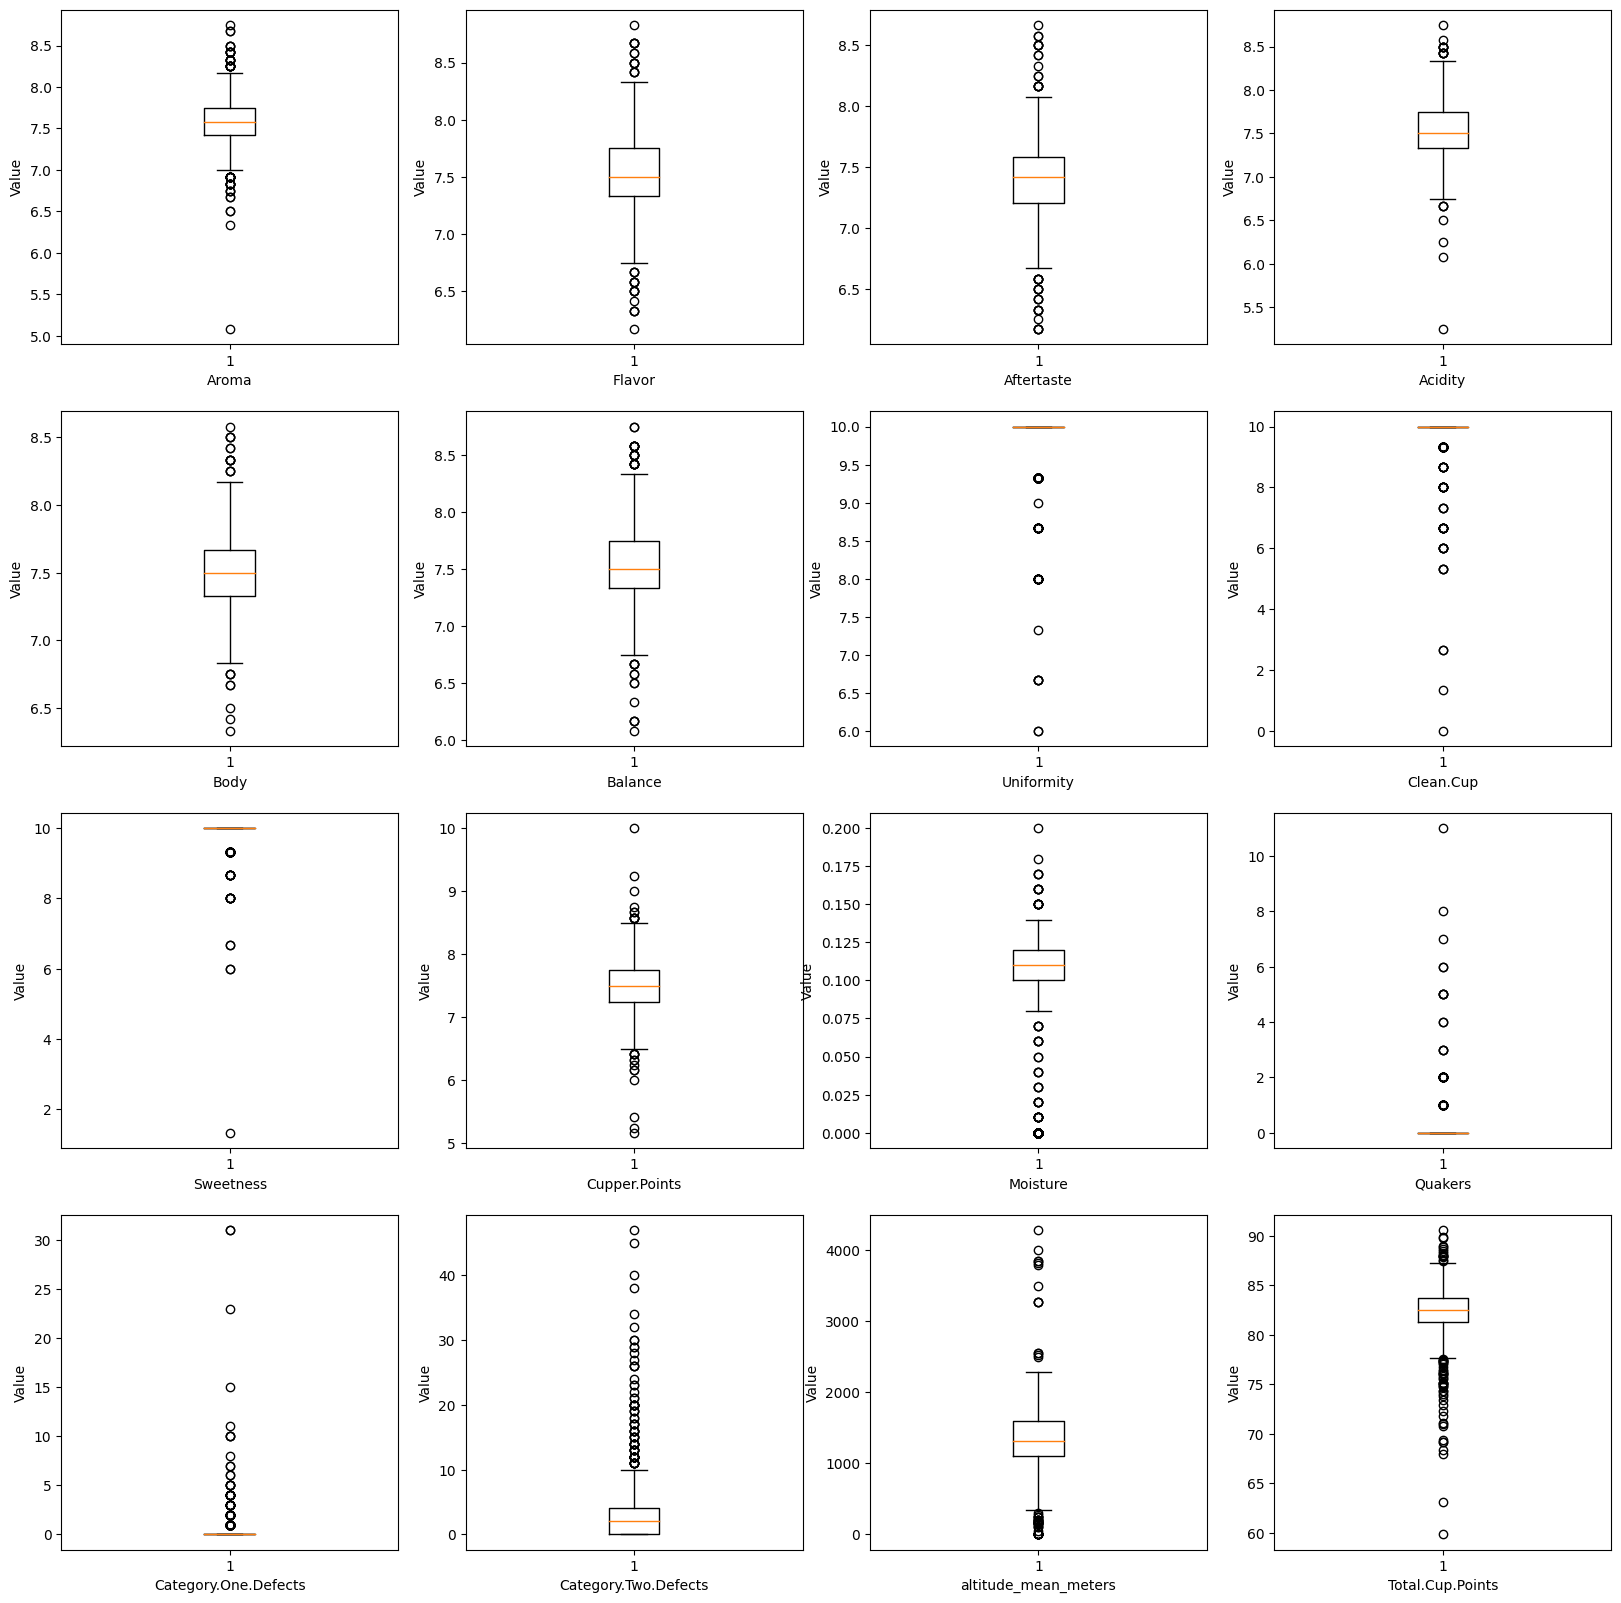

In [ ]:
fig = plt.figure(figsize = (20,20))
for i in range(len(col_names)):  
    bx = fig.add_subplot(4, 4, i + 1)
    bx.boxplot(df[col_names[i]])
    bx.set_xlabel(col_names[i])
    bx.set_ylabel('Value')

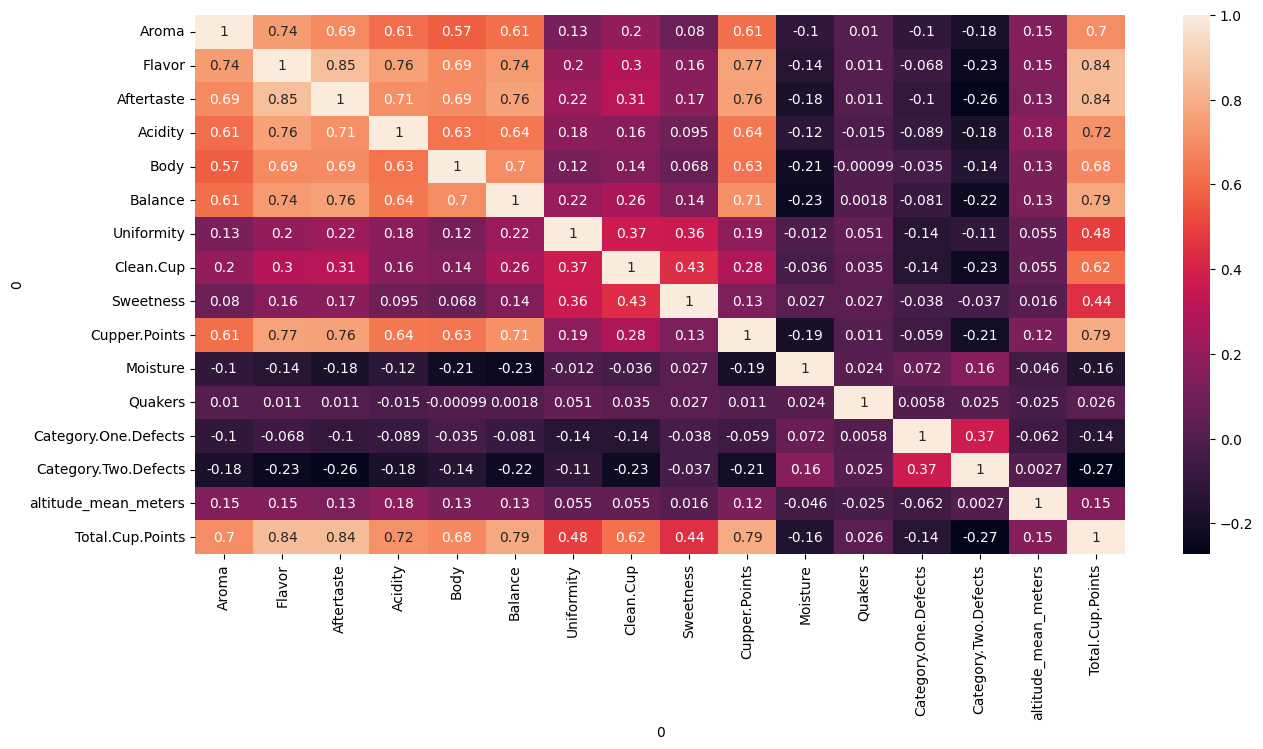

In [ ]:
plt.figure(figsize=[15,7])
sns.heatmap(df.corr(),annot=True)
plt.show()

## Split dataset into training and test sets (80, 20). Fit the same data to different models.

In [ ]:
# Split the dataset into training and test sets (80, 20).
X = pd.get_dummies(df.drop(target_name, axis=1))
y = df[target_name]
avg_y = y.mean()
binary_y = []
for i in y:
    if(i <= avg_y):
        binary_y.append(0)
    else:
        binary_y.append(1)
        
binary_y = np.array(binary_y)
X_train, X_test, y_train, y_test = train_test_split(X, binary_y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((863, 15), (216, 15), (863,), (216,))

## Linear Regression

In [ ]:
# Use all the features(1-15) to fit the linear regression model for feature 16 using the training set
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size = 0.2)
lr = LinearRegression()
lr.fit(X_train_lr, y_train_lr)
y_pred_lr = lr.predict(X_test_lr)

In [ ]:
# Report the coefficients, mean squared error and variance score for the model on the test set.

# The coefficients
lr_coef = lr.coef_
# The mean squared error
lr_mse = mean_squared_error(y_test_lr, y_pred_lr)
# Explained variance score :  1 is perfect prediction
v_score_lr = lr.score(X_test_lr, y_test_lr)


print('Coefficients:', lr_coef)
print("Mean squared error: ", lr_mse)
print('Variance score: ', v_score_lr)

Coefficients: [ 9.97594246e-01  1.00462263e+00  9.99600572e-01  9.92949828e-01
  1.00491397e+00  1.00305902e+00  1.00289852e+00  9.99215852e-01
  9.98773750e-01  9.95325162e-01  1.69388568e-02 -1.25798748e-03
 -4.52764092e-03 -2.00948457e-04 -1.08995048e-06]
Mean squared error:  0.00011135686339248057
Variance score:  0.999986394010812


In [ ]:
# Use cross-validation (K-fold) to evaluate the model
scores = cross_val_score(lr, X, y, cv=5)
# Report the mean score and standard deviation of the score
print('Cross-validated variance score:', scores.mean())
print('Standard deviation:', scores.std())

Cross-validated variance score: 0.998668009398006
Standard deviation: 0.0014913751211844605


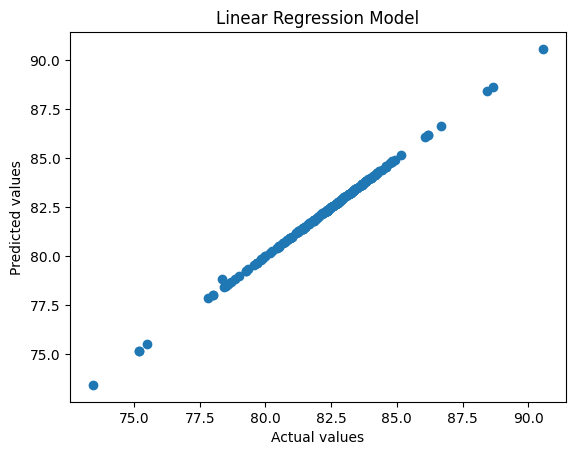

In [ ]:
# Visualise the Linear Regression Model
plt.scatter(y_test_lr, y_pred_lr)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression Model')
plt.show()

Feature: Aroma
Coefficients: [5.85319416]
Mean squared error:  2.48
Variance score: 0.64


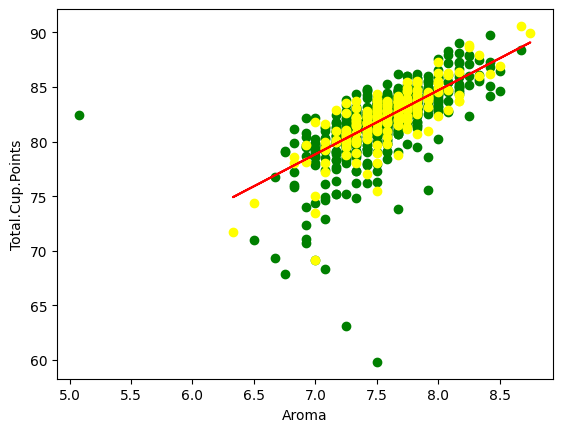

Feature: Flavor
Coefficients: [6.55068689]
Mean squared error:  2.54
Variance score: 0.69


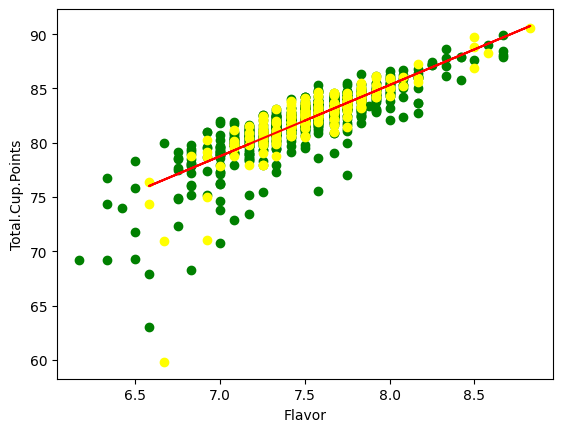

Feature: Aftertaste
Coefficients: [6.60776818]
Mean squared error:  2.13
Variance score: 0.64


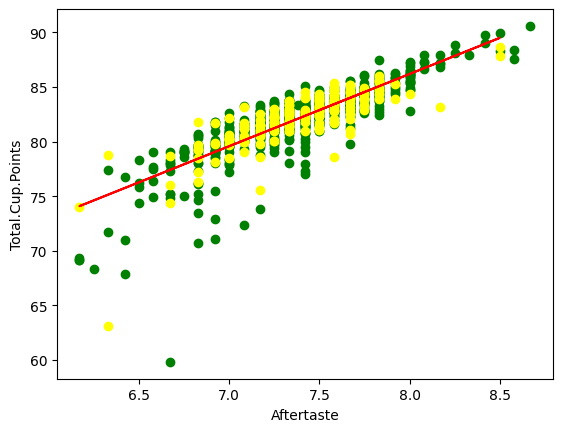

Feature: Acidity
Coefficients: [6.12256832]
Mean squared error:  2.45
Variance score: 0.55


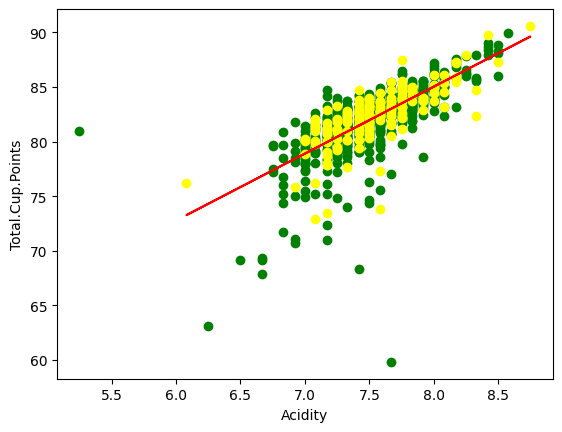

Feature: Body
Coefficients: [6.48556513]
Mean squared error:  2.84
Variance score: 0.55


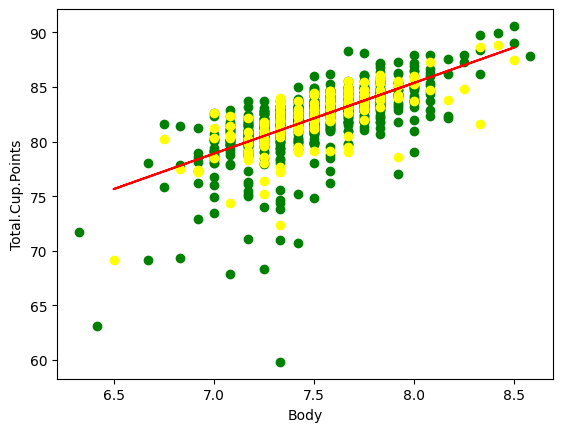

Feature: Balance
Coefficients: [6.04068947]
Mean squared error:  2.59
Variance score: 0.63


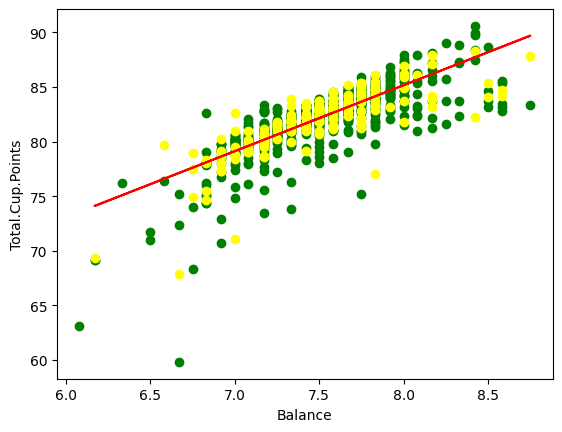

Feature: Uniformity
Coefficients: [2.75889076]
Mean squared error:  5.66
Variance score: 0.23


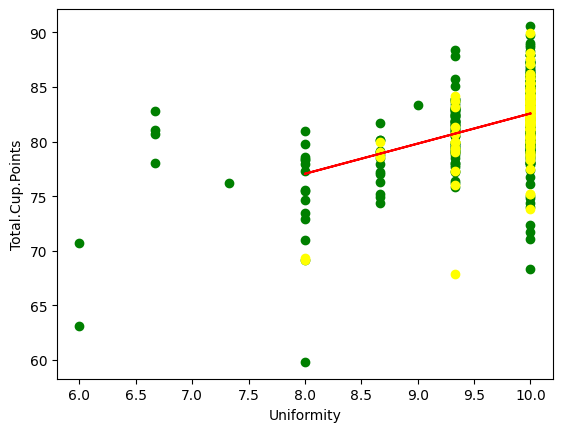

Feature: Clean.Cup
Coefficients: [2.21158017]
Mean squared error:  3.99
Variance score: 0.29


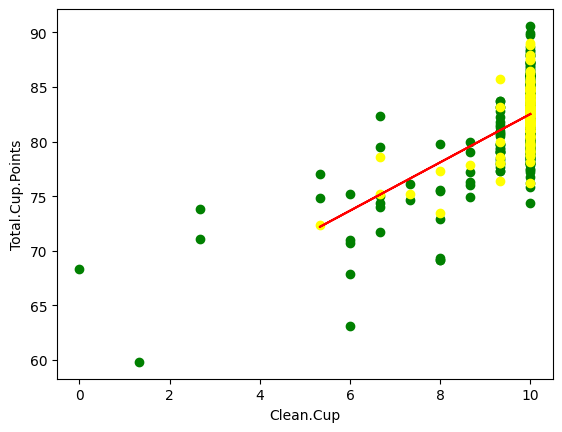

Feature: Sweetness
Coefficients: [3.06550038]
Mean squared error:  7.36
Variance score: -0.04


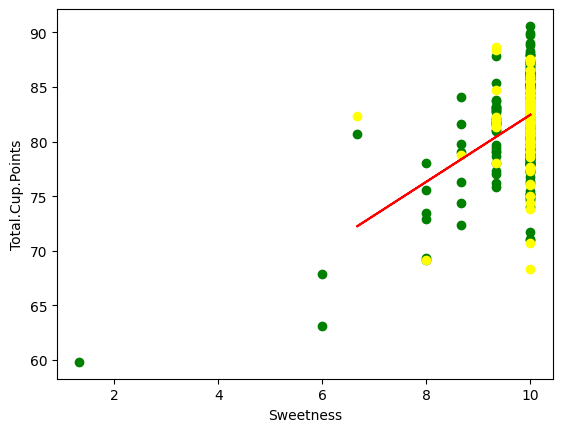

Feature: Cupper.Points
Coefficients: [4.76913182]
Mean squared error:  2.79
Variance score: 0.68


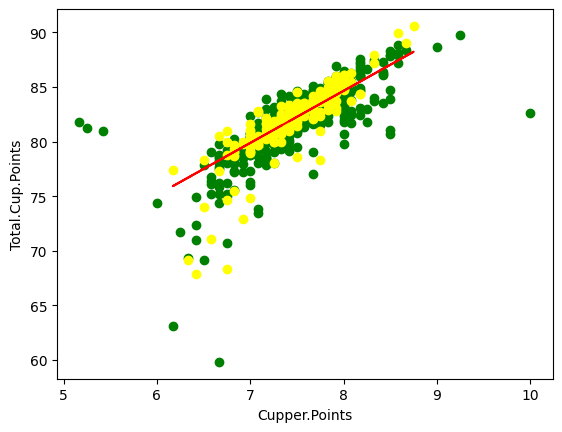

Feature: Moisture
Coefficients: [-8.91431378]
Mean squared error:  5.40
Variance score: 0.04


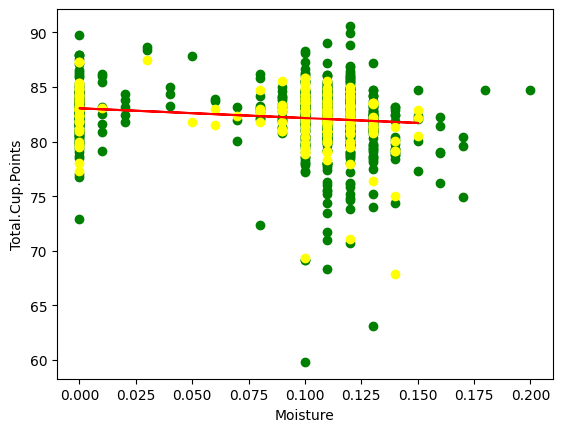

Feature: Quakers
Coefficients: [0.05805814]
Mean squared error:  8.33
Variance score: -0.00


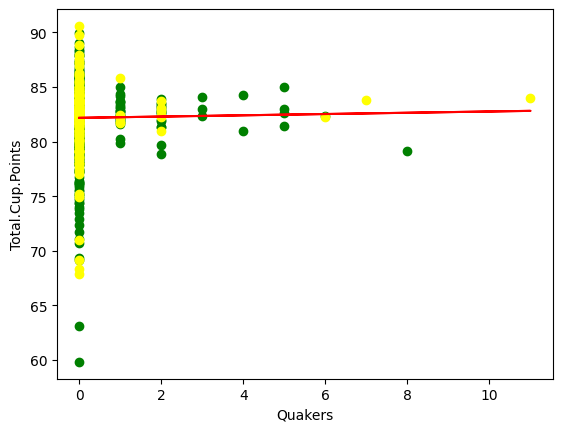

Feature: Category.One.Defects
Coefficients: [-0.17120892]
Mean squared error:  7.79
Variance score: 0.03


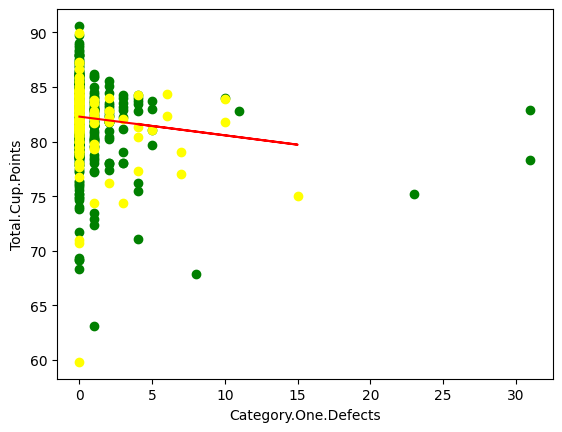

Feature: Category.Two.Defects
Coefficients: [-0.16772595]
Mean squared error:  7.02
Variance score: -0.06


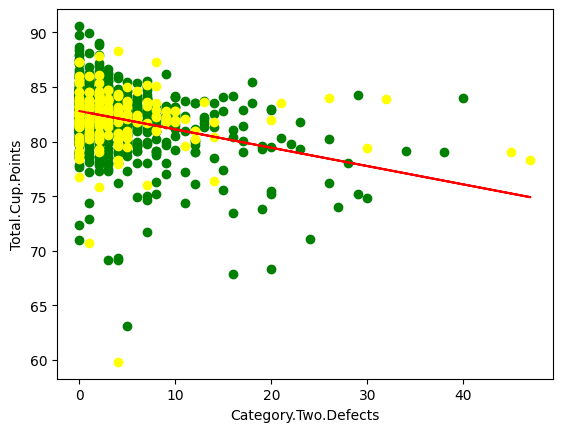

Feature: altitude_mean_meters
Coefficients: [0.00098947]
Mean squared error:  8.29
Variance score: -0.01


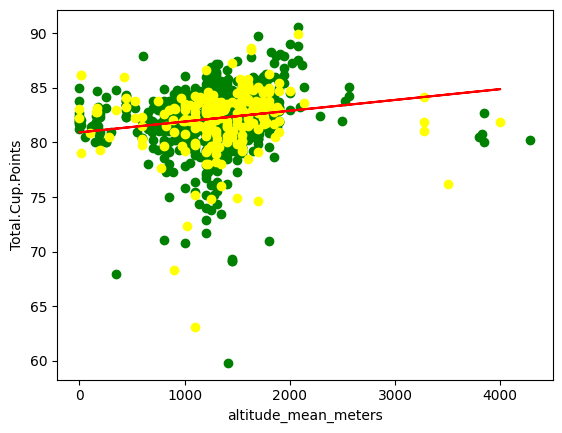

In [ ]:
# Report the coefficient, mean squared error and variance score for the model generated on each feature on the test set. 
# Also report the plots of the linear regression models generated on each feature
plt.figure()
for i in range(len(col_names) - 1):
    X_sep = pd.DataFrame(df[col_names[i]])
    X_train_sep, X_test_sep, y_train_sep, y_test_sep = train_test_split(X_sep, y, test_size=0.2)
    
    lr_sep = LinearRegression()
    lr_sep.fit(X_train_sep, y_train_sep)
    y_pred_sep = lr_sep.predict(X_test_sep)
    
    plt.scatter(X_train_sep, y_train_sep, label='train', c = 'green')
    plt.scatter(X_test_sep, y_test_sep, label='test', c = 'yellow')
    plt.plot(X_test_sep.values.reshape(-1,1) , y_pred_sep,label='linear regression line', c ='red')
    plt.xlabel(col_names[i])
    plt.ylabel(target_name)
    
    print('Feature: '+col_names[i])
    # The coefficients
    print('Coefficients:', lr_sep.coef_)
    # The mean squared error
    print("Mean squared error:  %.2f" % mean_squared_error(y_test_sep, y_pred_sep))
    # Explained variance score : 1 is perfect prediction
    print('Variance score: %.2f' % lr_sep.score(X_test_sep, y_test_sep))
  
    plt.show()

In [ ]:
coef = []
mse = []
var = []

coef_f = []
mse_f = []
var_f = []

# For all features
for i in range(10):
    X_train_ave, X_test_ave, y_train_ave, y_test_ave = train_test_split(X, y, test_size=0.2)
    lr_ave = LinearRegression()
    lr_ave.fit(X_train_ave, y_train_ave)
    y_pred_ave = lr_ave.predict(X_test_ave)
    
    coef.append(lr_ave.coef_)
    mse_val = mean_squared_error(y_pred_ave, y_test_ave)
    mse.append(mse_val)
    var.append(lr_ave.score(X_test_ave, y_test_ave))

# For each feature alone
for j in range(10):
    tmp1 = []
    tmp2 = []
    tmp3 = []
    for k in range(len(col_names) - 1):
        X_ft = pd.DataFrame(df[col_names[i]])
        X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(X_ft, y, test_size=0.2)
        regr_ft = LinearRegression()
        regr_ft.fit(X_train_ft, y_train_ft)
        y_pred_ft = regr_ft.predict(X_test_ft)
        
        tmp1.append(regr_ft.coef_)
        mse_val_ft = mean_squared_error(y_pred_ft, y_test_ft)
        tmp2.append(mse_val_ft)
        tmp3.append(regr_ft.score(X_test_ft, y_test_ft))
        
    coef_f.append(tmp1)
    mse_f.append(tmp2)
    var_f.append(tmp3)

co_all = []
c = []
m = []
v =[]

for i in range(len(col_names) - 1):
    tmp = 0
    tmp1 = 0
    m_tmp = 0
    v_tmp = 0
    for j in range(10):
        tmp += coef[j][i]
        tmp1 += coef_f[j][i]
        m_tmp += mse_f[j][i]
        v_tmp += var_f[j][i]

    tmp = tmp/10
    tmp1 = tmp1/10
    m_tmp = m_tmp/10
    v_tmp = v_tmp/10

    co_all.append(tmp)
    c.append(tmp1)
    m.append(m_tmp)
    v.append(v_tmp)
    print('Feature: '+ feature_names[i])
    print("Avg Coefficients : %.2f" % tmp1[0])
    print("Avg Mean Squared Error : %.2f" % m[i])
    print("Avg Variance Score : %.2f\n" % v[i])

print('All Features')
print("Avg Coefficients : ", co_all)
print("Avg Mean Squared Error : ", (sum(mse) / len(mse)))
print("Avg  Variance Score : ", (sum(var) / len(var)))

Feature: Aroma
Avg Coefficients : 5.00
Avg Mean Squared Error : 2.77
Avg Variance Score : 0.61

Feature: Flavor
Avg Coefficients : 5.00
Avg Mean Squared Error : 2.79
Avg Variance Score : 0.60

Feature: Aftertaste
Avg Coefficients : 5.01
Avg Mean Squared Error : 2.36
Avg Variance Score : 0.67

Feature: Acidity
Avg Coefficients : 5.08
Avg Mean Squared Error : 2.88
Avg Variance Score : 0.59

Feature: Body
Avg Coefficients : 5.06
Avg Mean Squared Error : 2.26
Avg Variance Score : 0.63

Feature: Balance
Avg Coefficients : 5.05
Avg Mean Squared Error : 2.58
Avg Variance Score : 0.62

Feature: Uniformity
Avg Coefficients : 4.97
Avg Mean Squared Error : 2.85
Avg Variance Score : 0.63

Feature: Clean.Cup
Avg Coefficients : 4.98
Avg Mean Squared Error : 2.46
Avg Variance Score : 0.65

Feature: Sweetness
Avg Coefficients : 5.08
Avg Mean Squared Error : 3.17
Avg Variance Score : 0.56

Feature: Cupper.Points
Avg Coefficients : 5.11
Avg Mean Squared Error : 2.76
Avg Variance Score : 0.60

Feature: M

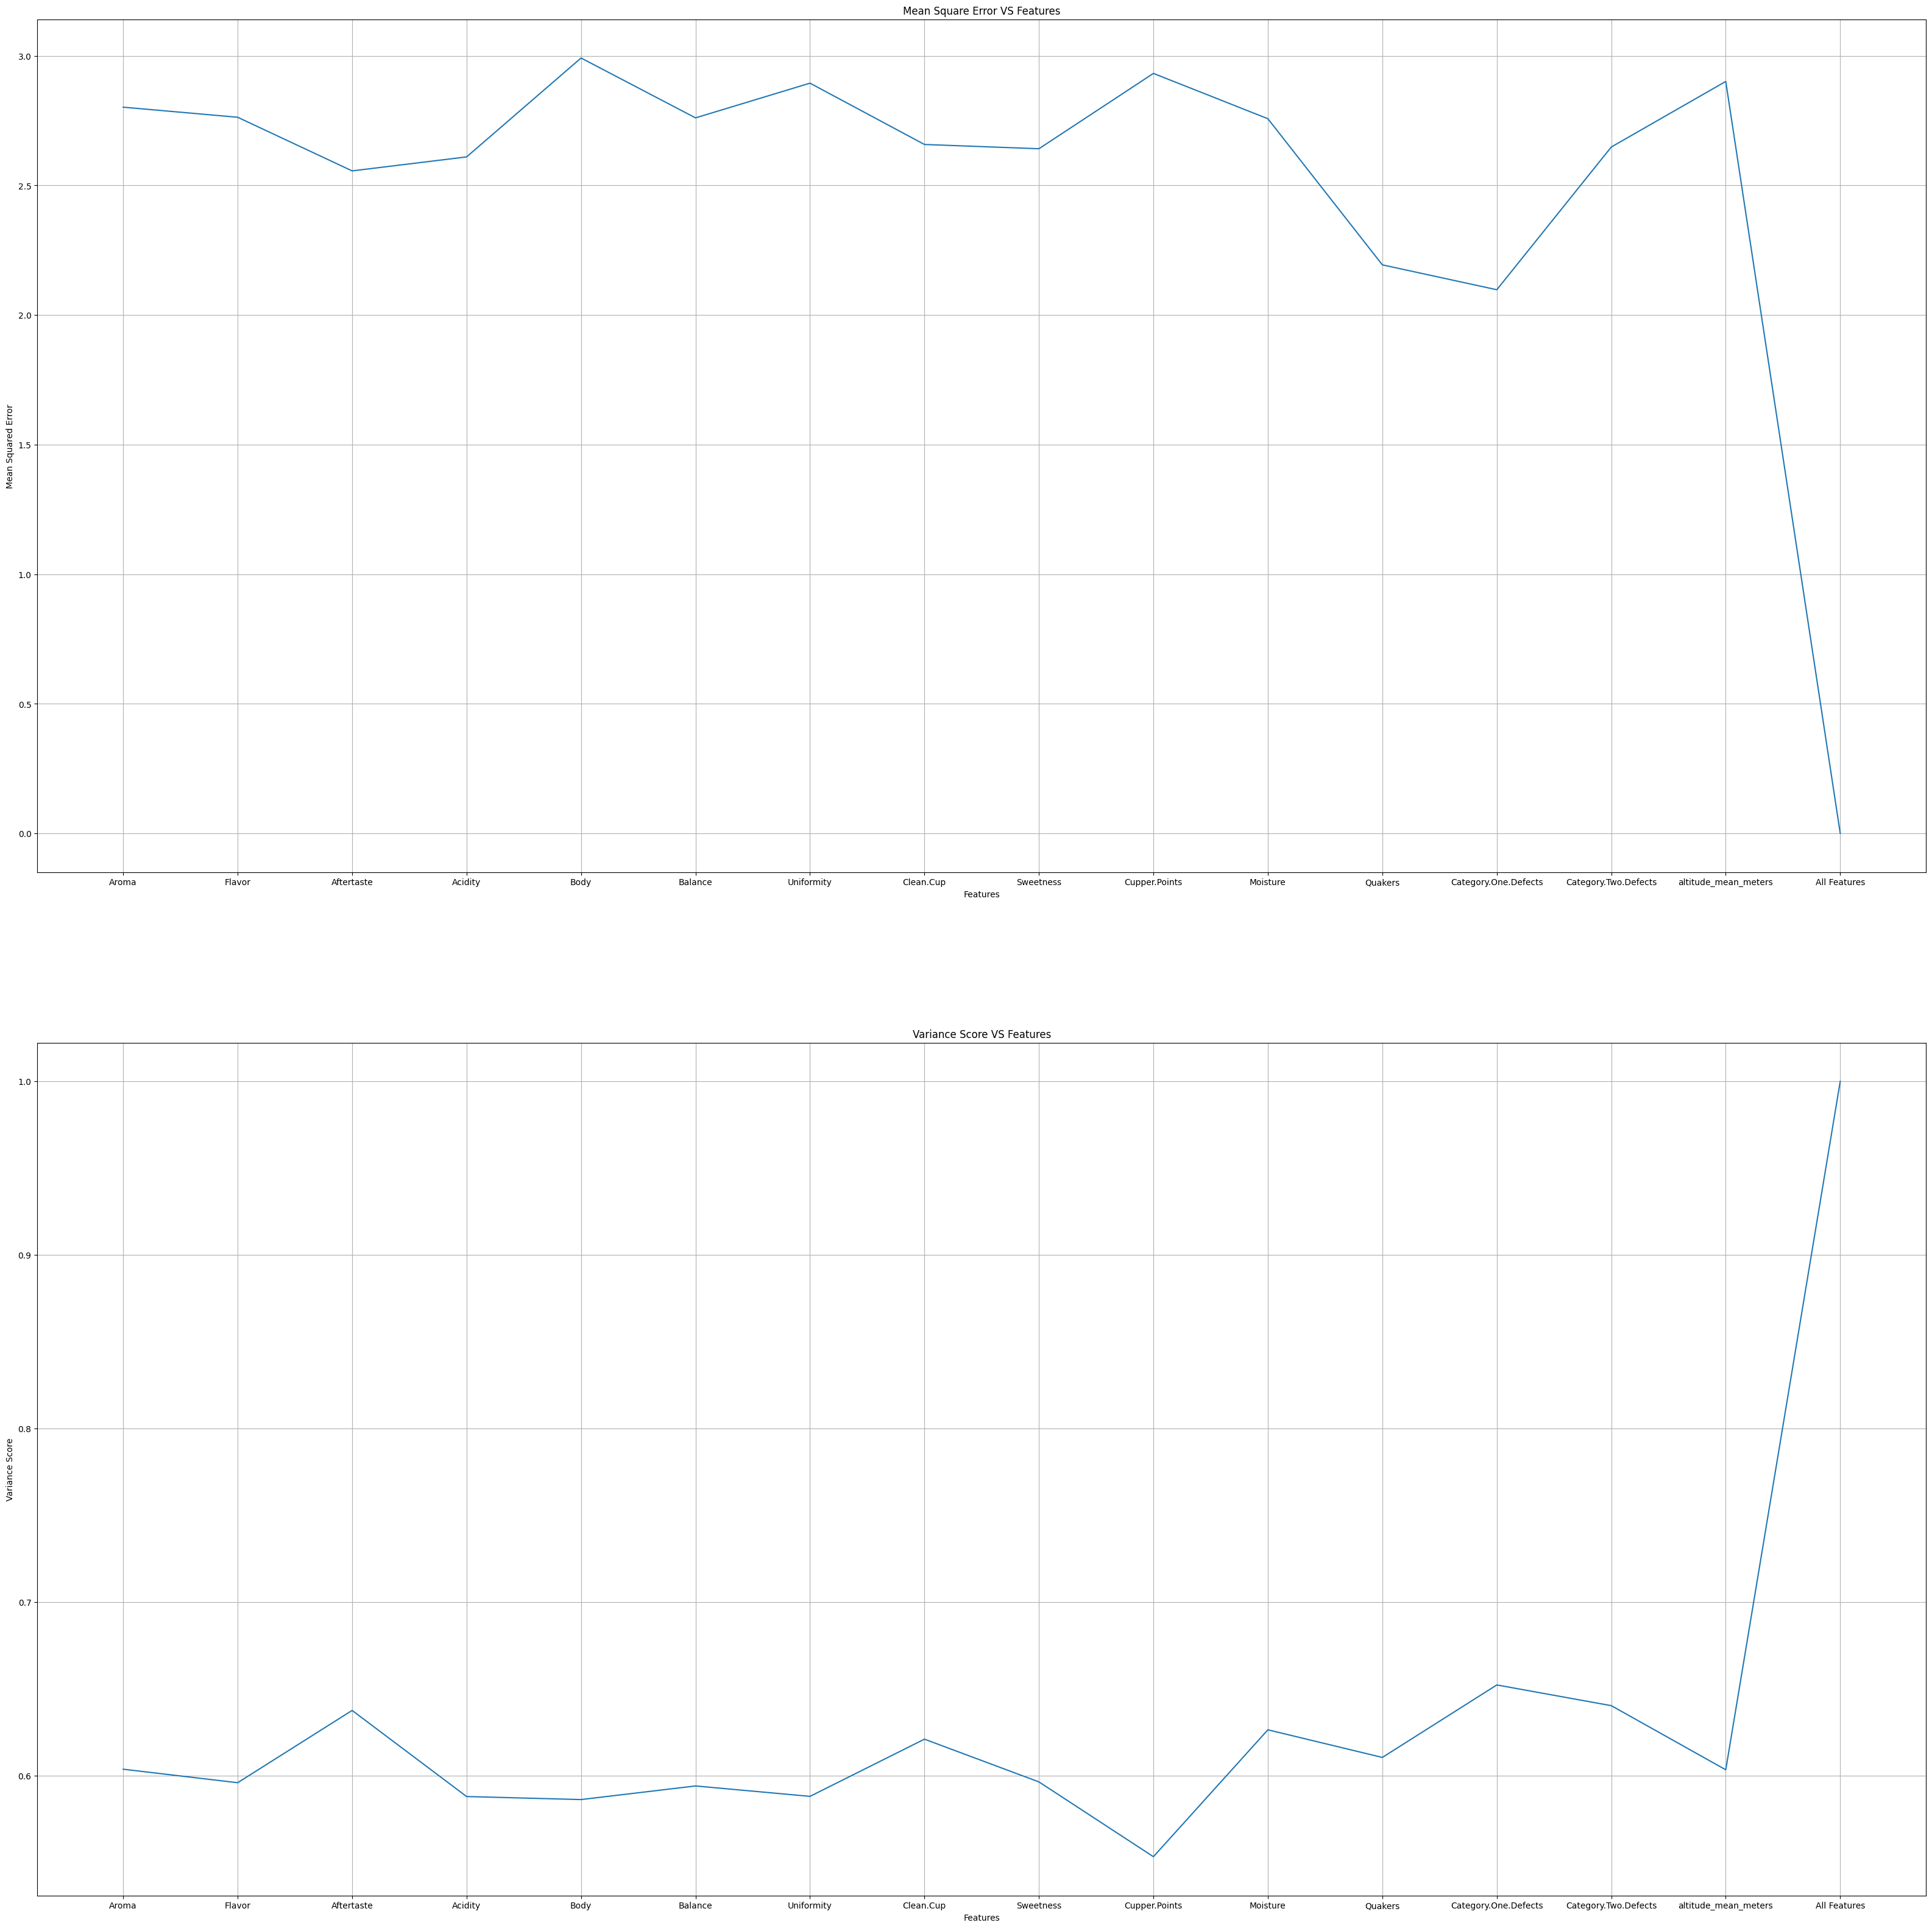

In [ ]:
# Report mean square error vs features plot and variance score vs features plot to compare the model performance
plt.figure(figsize = (40, 40))
features = feature_names
features.append("All Features")

m.append((sum(mse) / len(mse)))
v.append((sum(var) / len(var)))
plt.subplot(2,1,1)
s1=plt.plot(features, m)
plt.grid(True)
plt.ylabel('Mean Squared Error')
plt.xlabel('Features')
plt.title("Mean Square Error VS Features")
plt.subplot(2,1,2)
s2=plt.plot(features, v)
plt.grid(True)
plt.ylabel('Variance Score')
plt.xlabel('Features')
plt.title("Variance Score VS Features")
plt.show()

## Logistic Regression

In [ ]:
# Use all the features (1-15) to fit the logistic regression model for feature 16 using the training set
from sklearn.linear_model import LogisticRegression
logi_reg = LogisticRegression(max_iter=3000)
logi_reg.fit(X_train, y_train)
y_pred = logi_reg.predict(X_test)

In [ ]:
# Report the coefficients, mean squared error and variance score for the model on the test set.
from sklearn.metrics import mean_squared_error
print("Coefficients:", logi_reg.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Variance score: %.2f" % logi_reg.score(X_test , y_test))

Coefficients: [[ 9.30890273e-02  1.66853975e+00  1.66605763e+00  7.47204502e-01
  -1.08346654e+00  8.41268096e-01 -9.66692837e-03 -2.45060377e-01
  -4.08031139e+00  2.05329318e+00 -2.45664818e-01  2.32035323e-01
   1.28397526e-02 -3.15171714e-02  2.32765105e-04]]
Mean squared error: 0.11
Variance score: 0.89


In [ ]:
# Repot the accuracy, precision score, recall value, classfication report, and confusion matrix for the model
accuracy_score_1 = accuracy_score(y_test, y_pred)
precision_score_1 = precision_score(y_test, y_pred)
recall_score_1 = recall_score(y_test, y_pred)
classification_report_1 = classification_report(y_test, y_pred)
confusion_matrix_1 = confusion_matrix(y_test, y_pred)
print("The accuracy of Logistic Regression on the test data is:", accuracy_score_1)
print("The precision score is:", precision_score_1)
print("The recall value is:", recall_score_1)
print("The classification report is:\n", classification_report_1)
print("The confusion matrix for this experiment is:", confusion_matrix_1)

The accuracy of Model 1 on the test data is: 0.8888888888888888
The precision score is: 0.85
The recall value is: 0.9754098360655737
The classification report is:
               precision    recall  f1-score   support

           0       0.96      0.78      0.86        94
           1       0.85      0.98      0.91       122

    accuracy                           0.89       216
   macro avg       0.91      0.88      0.88       216
weighted avg       0.90      0.89      0.89       216

The confusion matrix for this experiment is: [[ 73  21]
 [  3 119]]


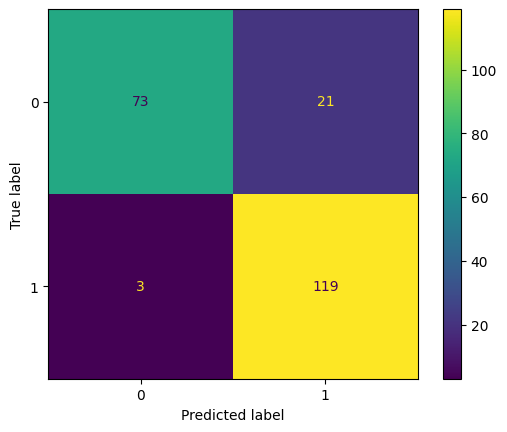

In [ ]:
cfm = metrics.ConfusionMatrixDisplay(confusion_matrix_1, display_labels=None)
cfm.plot()
plt.show()

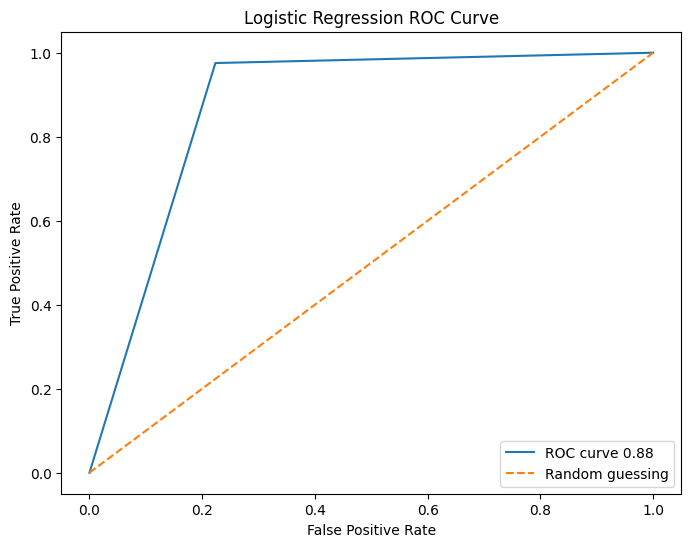

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC curve %0.2f"% roc_auc)
plt.plot([0, 1], [0, 1], linestyle="--", label="Random guessing")
plt.title("Logistic Regression ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

1. Feature: Aroma
Coefficients: [[5.9961614]]
Mean squared error: 0.17
Variance score: 0.83


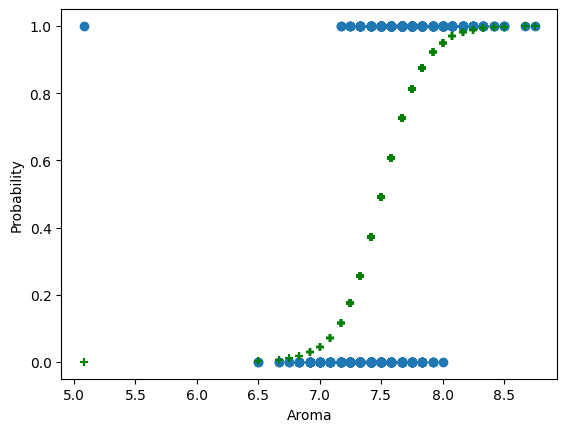

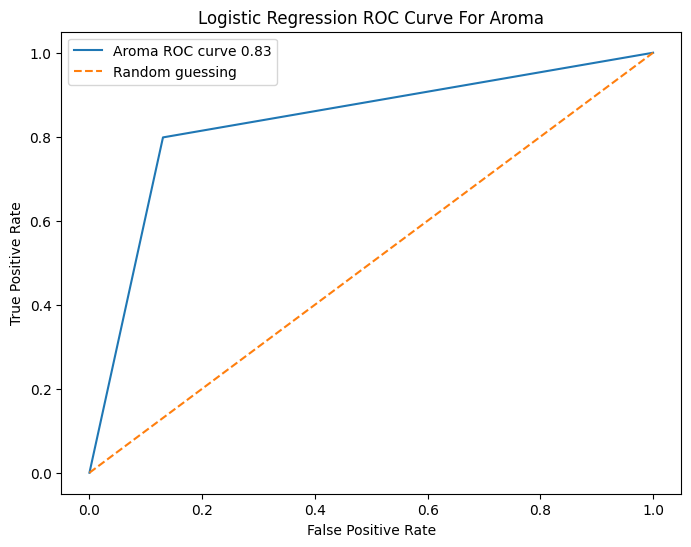

2. Feature: Flavor
Coefficients: [[8.10701737]]
Mean squared error: 0.15
Variance score: 0.85


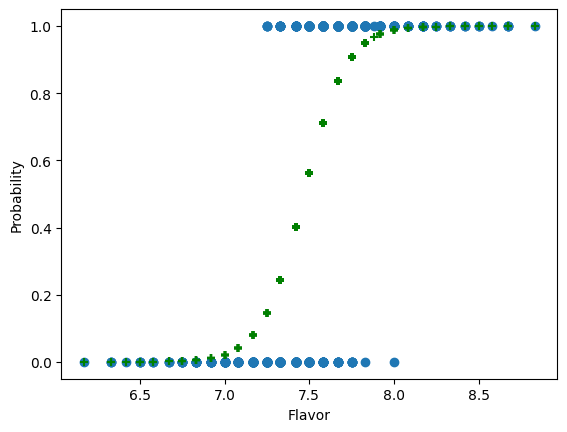

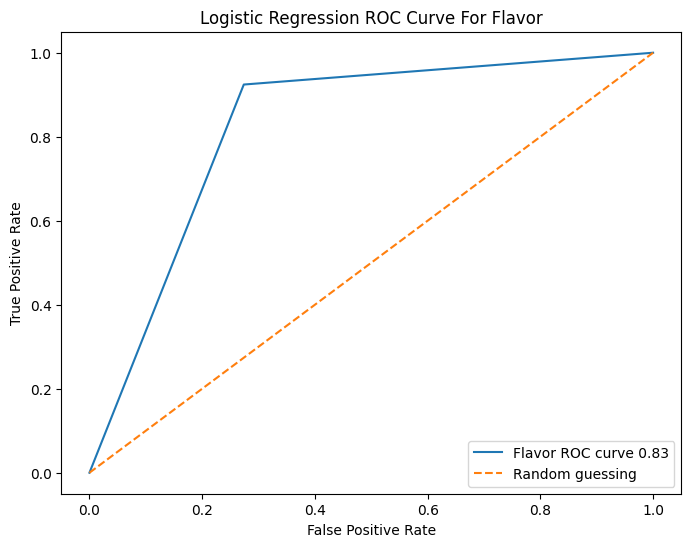

3. Feature: Aftertaste
Coefficients: [[7.58628522]]
Mean squared error: 0.15
Variance score: 0.85


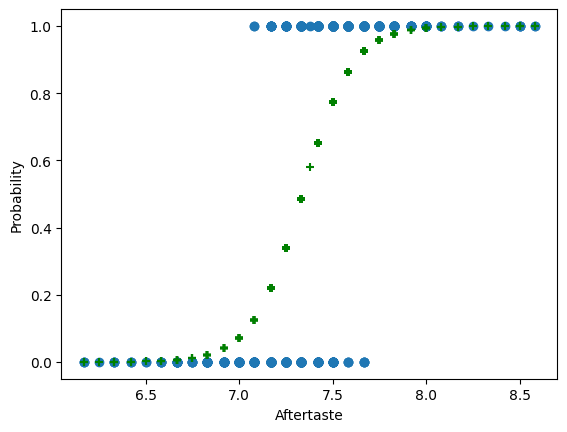

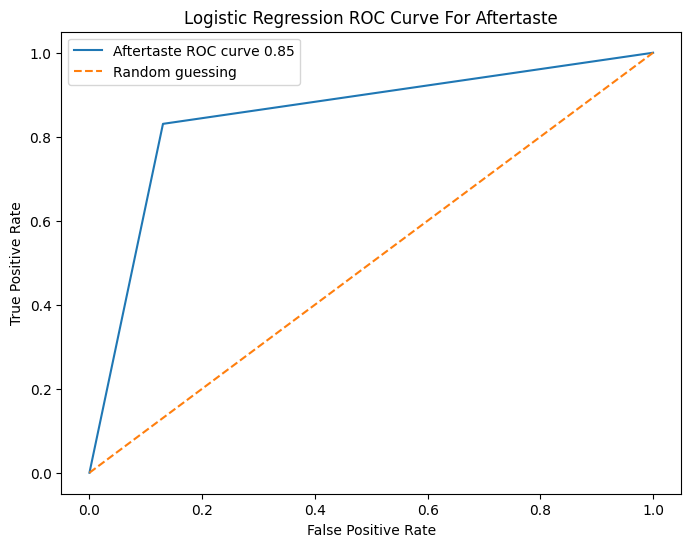

4. Feature: Acidity
Coefficients: [[6.76234468]]
Mean squared error: 0.18
Variance score: 0.82


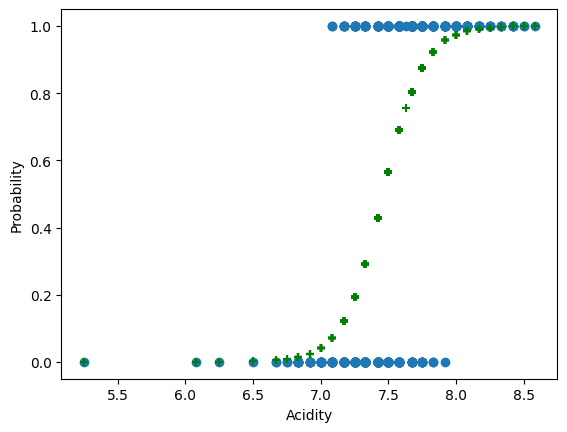

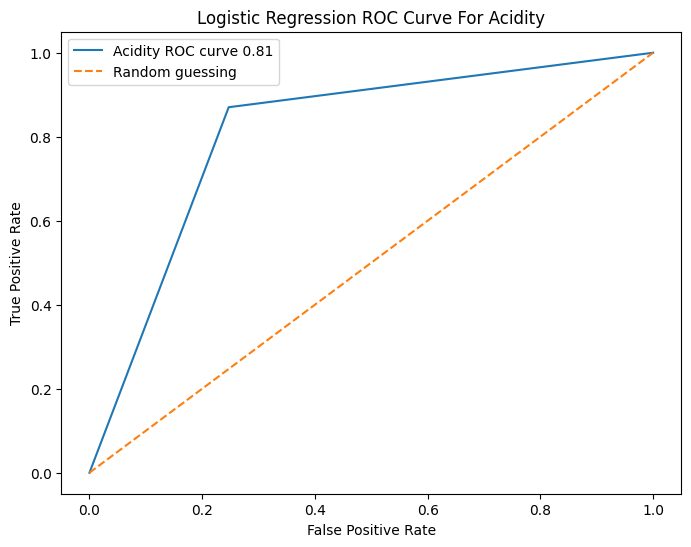

5. Feature: Body
Coefficients: [[5.64752644]]
Mean squared error: 0.20
Variance score: 0.80


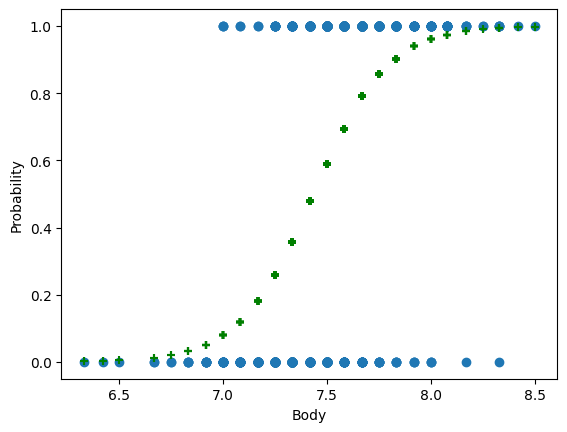

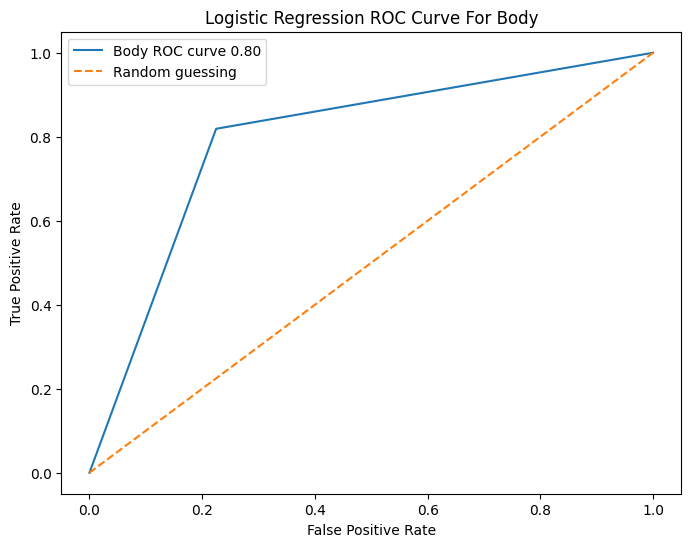

6. Feature: Balance
Coefficients: [[6.64686335]]
Mean squared error: 0.18
Variance score: 0.82


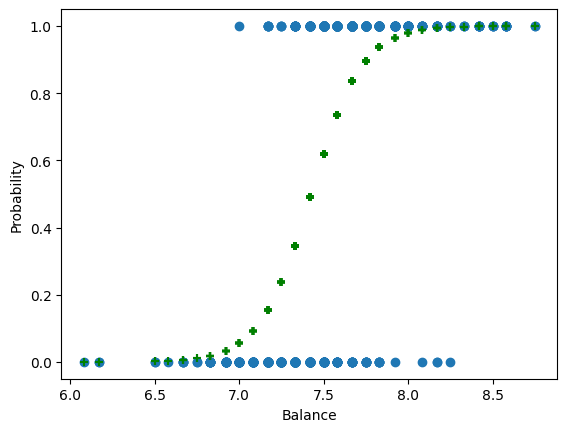

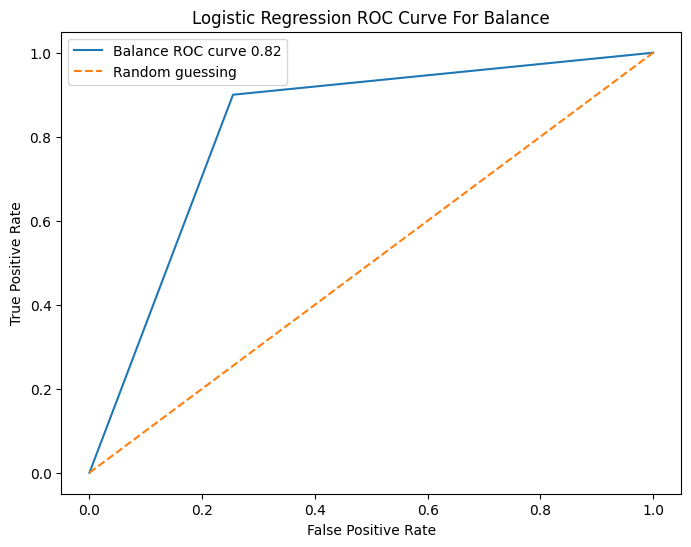

7. Feature: Uniformity
Coefficients: [[1.54261443]]
Mean squared error: 0.32
Variance score: 0.68


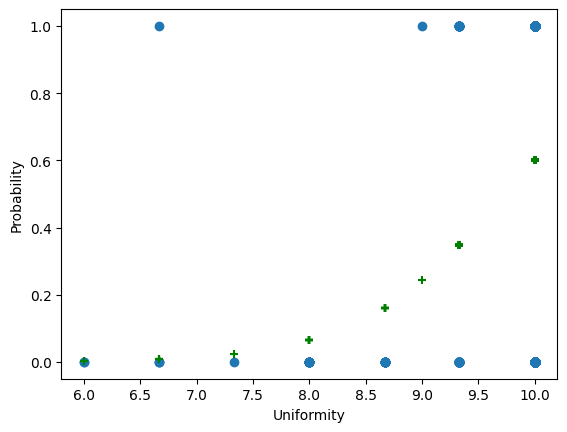

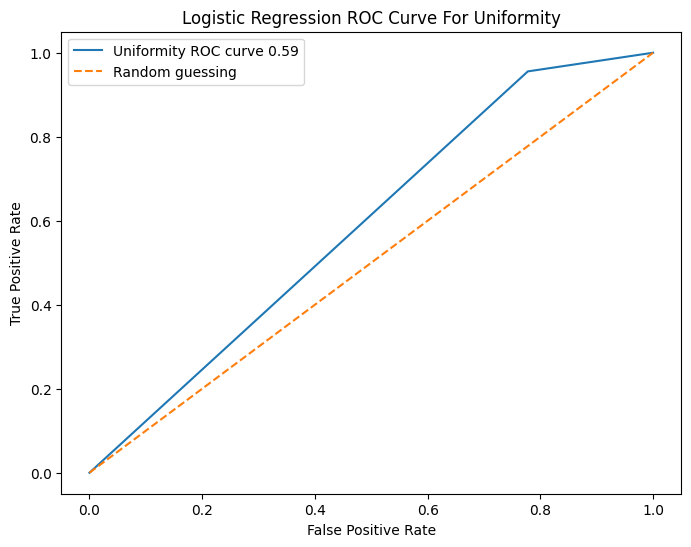

8. Feature: Clean.Cup
Coefficients: [[1.78684399]]
Mean squared error: 0.38
Variance score: 0.62


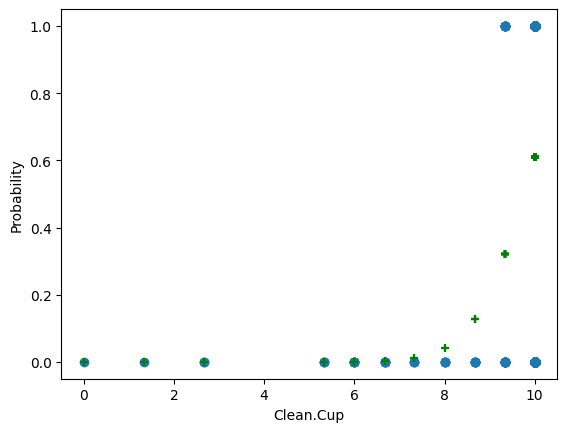

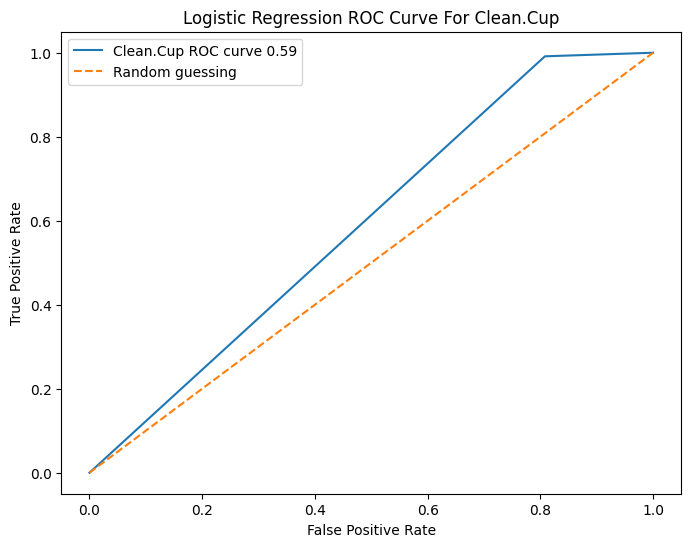

9. Feature: Sweetness
Coefficients: [[0.86676632]]
Mean squared error: 0.35
Variance score: 0.65


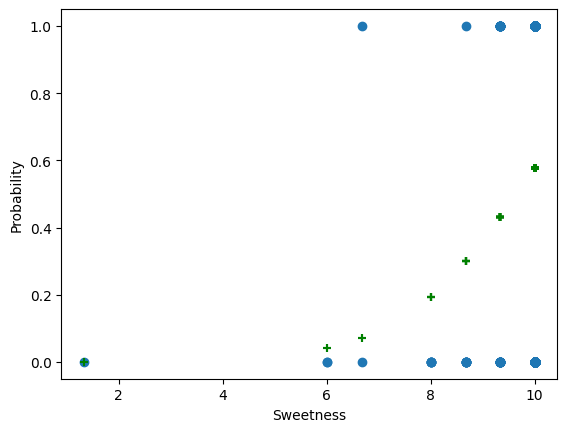

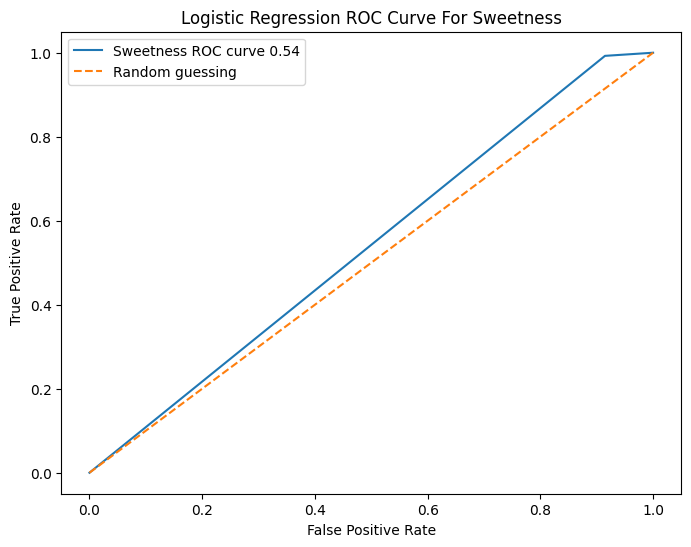

10. Feature: Cupper.Points
Coefficients: [[6.91706552]]
Mean squared error: 0.15
Variance score: 0.85


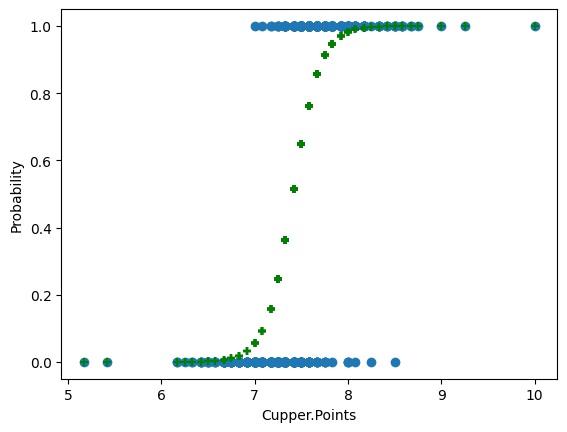

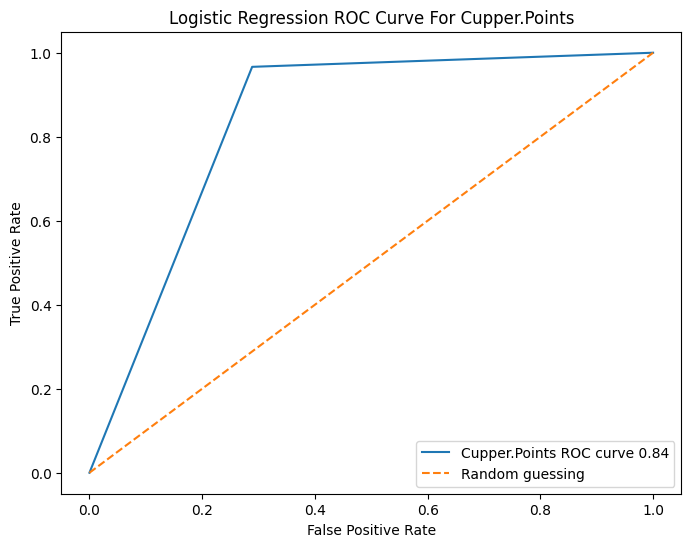

11. Feature: Moisture
Coefficients: [[-1.9983434]]
Mean squared error: 0.39
Variance score: 0.61


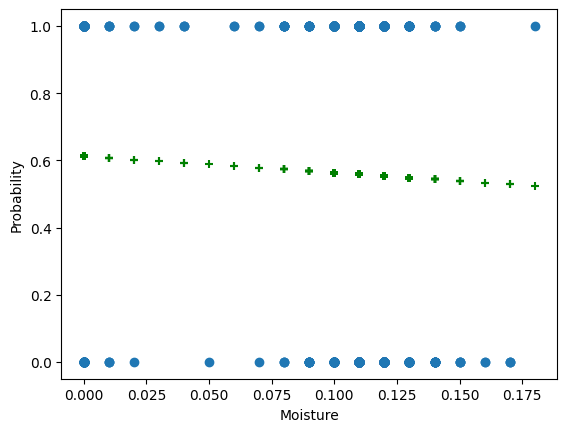

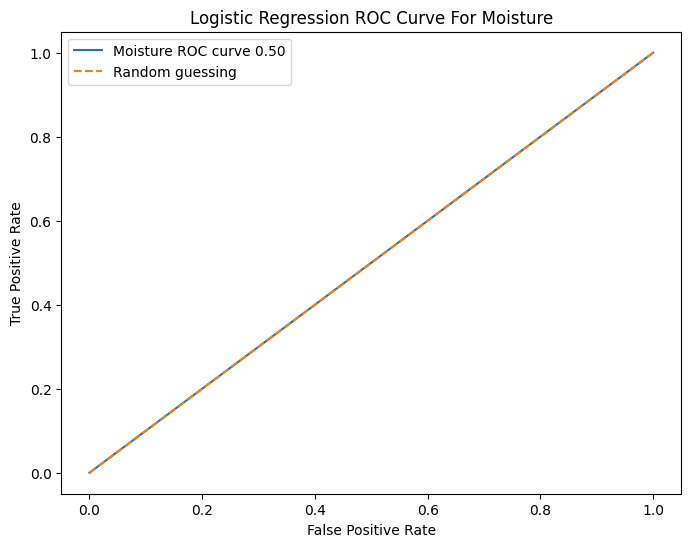

12. Feature: Quakers
Coefficients: [[0.17950794]]
Mean squared error: 0.47
Variance score: 0.53


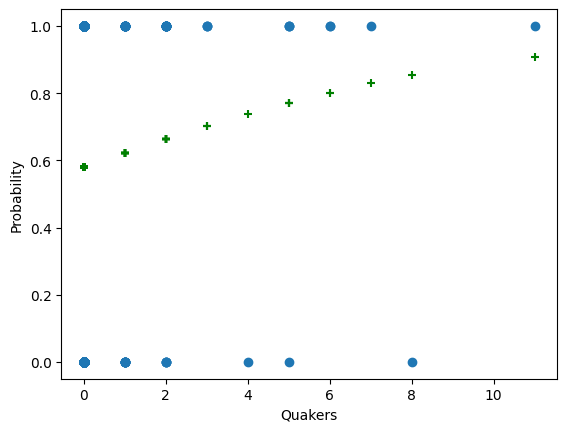

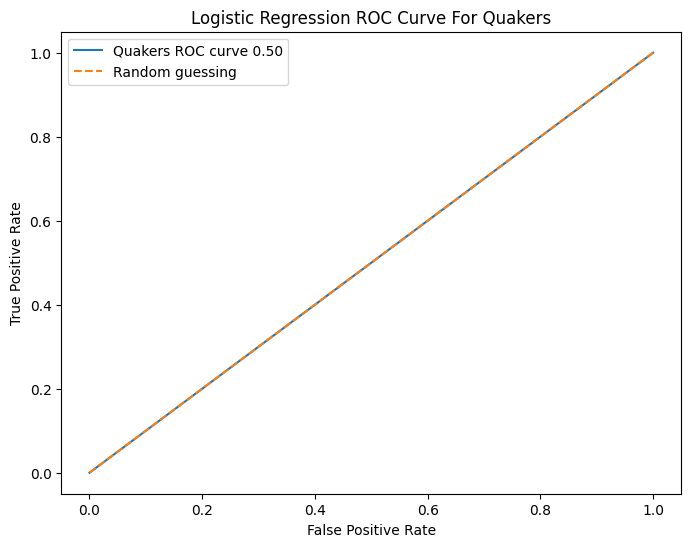

13. Feature: Category.One.Defects
Coefficients: [[-0.04647207]]
Mean squared error: 0.43
Variance score: 0.57


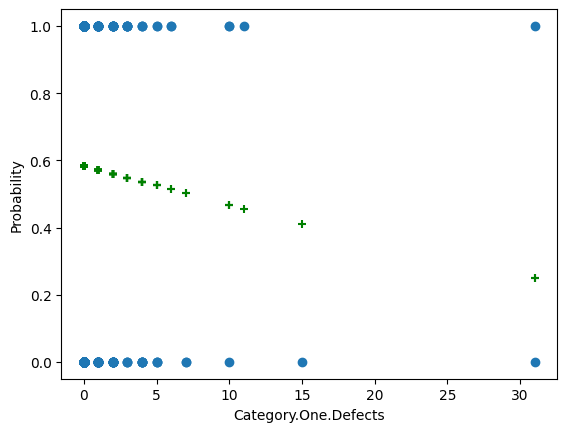

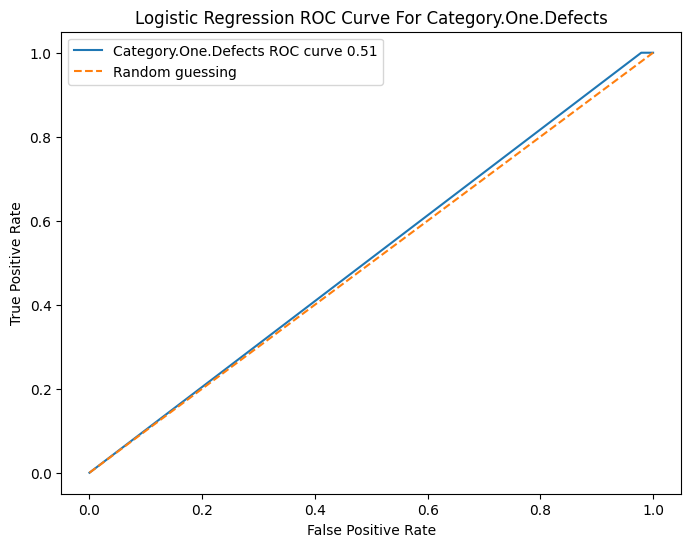

14. Feature: Category.Two.Defects
Coefficients: [[-0.05968893]]
Mean squared error: 0.38
Variance score: 0.62


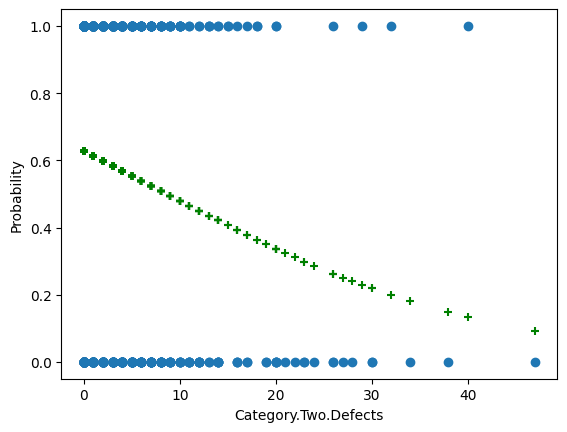

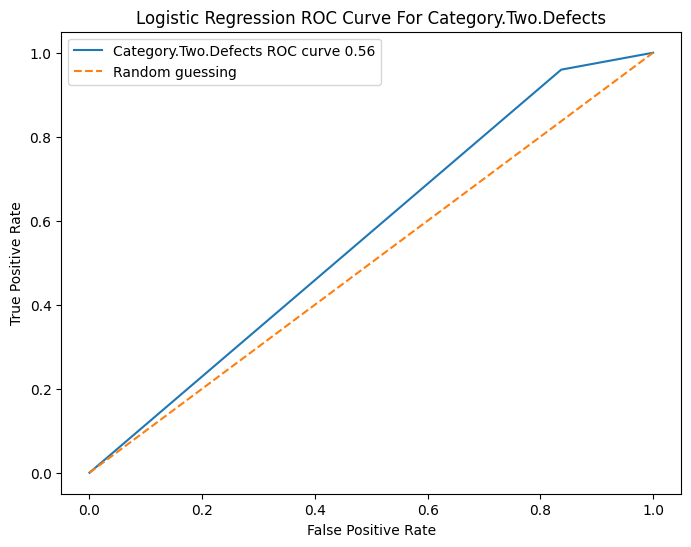

15. Feature: altitude_mean_meters
Coefficients: [[0.00029769]]
Mean squared error: 0.46
Variance score: 0.54


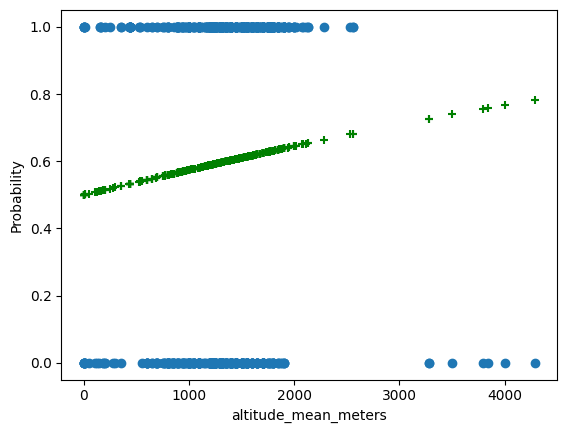

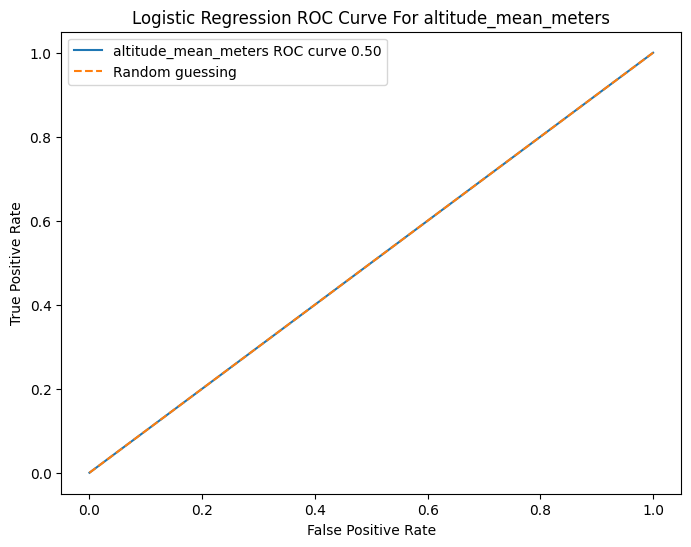

In [ ]:
for i in range(15):
    X_1 = pd.DataFrame(df[col_names[i]])
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, binary_y, test_size=0.2)
    logi_reg = LogisticRegression()
    logi_reg.fit(X_train_1, y_train_1)
    y_pred_1 =logi_reg.predict(X_test_1)
    
    print(str(i+1) + '. Feature: ' + col_names[i])
    print('Coefficients:', logi_reg.coef_)
    print("Mean squared error: %.2f" % mean_squared_error(y_test_1, y_pred_1))
    print('Variance score: %.2f' % logi_reg.score(X_test_1,y_test_1))
    
    plt.scatter(X_train_1, y_train_1)
    plt.scatter(X_train_1, logi_reg.predict_proba(X_train_1)[:,1], color="green", marker="+")
    plt.xlabel(col_names[i])
    plt.ylabel("Probability")
    plt.show()
    
    fpr_1, tpr_1, _ = roc_curve(y_test_1, y_pred_1, pos_label=None, sample_weight=None, drop_intermediate=True)
    roc_auc_1 = metrics.roc_auc_score(y_test_1, y_pred_1)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_1, tpr_1, label=col_names[i] + " ROC curve %0.2f"% roc_auc_1)
    plt.plot([0, 1], [0, 1], linestyle="--", label="Random guessing")
    plt.title("Logistic Regression ROC Curve For " + col_names[i])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

## Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Default model with no restrains on number of estimators and depth
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [ ]:
print("Test Score:", rf_clf.score(X_test, y_test))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_rf))
print("Variance score: %.2f" % rf_clf.score(X_test , y_test))

Test Score: 0.9212962962962963
Mean squared error: 0.08
Variance score: 0.92


In [ ]:
accuracy_score_rf = accuracy_score(y_test, y_pred_rf)
precision_score_rf = precision_score(y_test, y_pred_rf)
recall_score_rf = recall_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("The accuracy of default Model on the test data is:", accuracy_score_rf)
print("The precision score is:", precision_score_rf)
print("The recall value is:", recall_score_rf)
print("The classification report is:\n", classification_report_rf)
print("The confusion matrix for this experiment is:", confusion_matrix_rf)

The accuracy of default Model on the test data is: 0.9212962962962963
The precision score is: 0.9264705882352942
The recall value is: 0.9473684210526315
The classification report is:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90        83
           1       0.93      0.95      0.94       133

    accuracy                           0.92       216
   macro avg       0.92      0.91      0.92       216
weighted avg       0.92      0.92      0.92       216

The confusion matrix for this experiment is: [[ 73  10]
 [  7 126]]


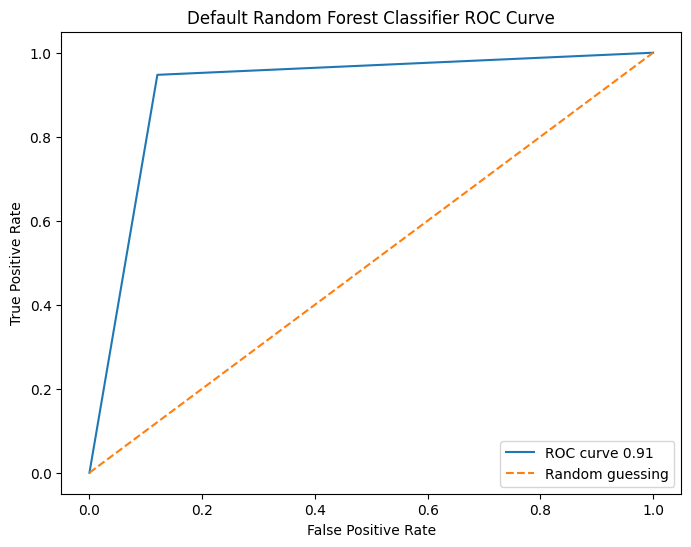

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = metrics.roc_auc_score(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label="ROC curve %0.2f"% roc_auc_rf)
plt.plot([0, 1], [0, 1], linestyle="--", label="Random guessing")
plt.title("Default Random Forest Classifier ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

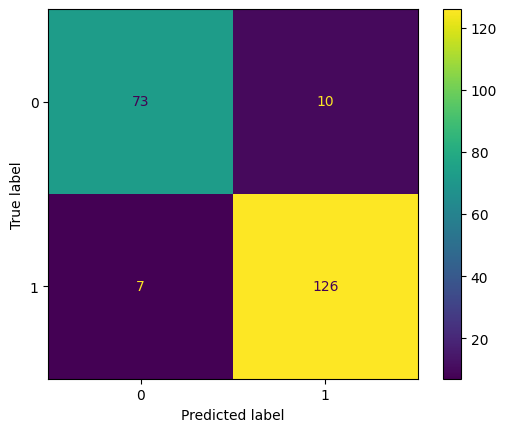

In [ ]:
cfm_rf = metrics.ConfusionMatrixDisplay(confusion_matrix_rf, display_labels=None)
cfm_rf.plot()
plt.show()

In [ ]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Parameter Tuning for Random Forest

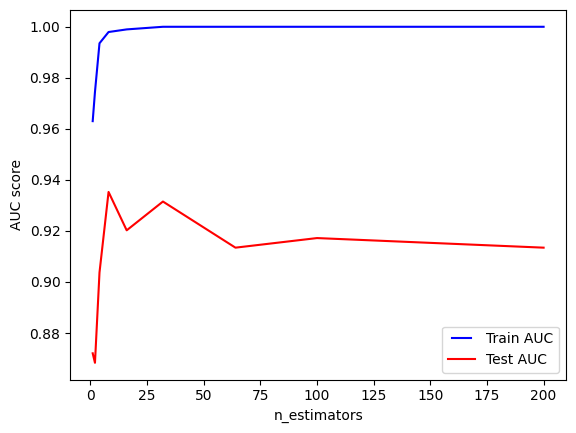

In [ ]:
# n_estimators
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for num in n_estimators:
  rf = RandomForestClassifier(n_estimators=num, n_jobs=-1)
  rf.fit(X_train, y_train)
  train_pred = rf.predict(X_train)
  roc_auc_rf_tuning = roc_auc_score(y_train, train_pred)
  train_results.append(roc_auc_rf_tuning)

  y_pred_rf_tuning = rf.predict(X_test)
  roc_auc_rf_tuning = roc_auc_score(y_test, y_pred_rf_tuning)
  test_results.append(roc_auc_rf_tuning)

line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

From the AUC plot above, we could see that we need to stop at 32 trees as increasing the tree number only causes overfitting and decrease the performance.

In [ ]:
optimal_n_estimator = 32

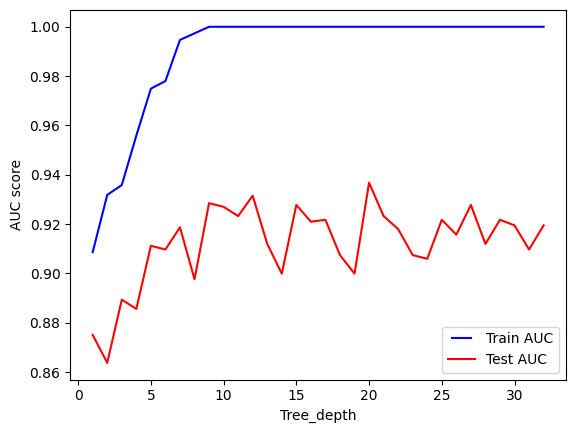

In [ ]:
# max_depth
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for depth in max_depths:
  rf = RandomForestClassifier(n_estimators=optimal_n_estimator, max_depth=int(depth), n_jobs=-1)
  rf.fit(X_train, y_train)
  train_pred = rf.predict(X_train)
  roc_auc_rf_tuning = roc_auc_score(y_train, train_pred)
  train_results.append(roc_auc_rf_tuning)

  y_pred_rf_tuning = rf.predict(X_test)
  roc_auc_rf_tuning = roc_auc_score(y_test, y_pred_rf_tuning)
  test_results.append(roc_auc_rf_tuning)

line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree_depth')
plt.show()

We could easily observe that our model overfits data when the tree depth grows. The forest successfully predicts all of the training data, but failed to perform such consistency for the test data. 

In [ ]:
optimal_max_depth = 10

### Random Forest Classifier with Optimal Number of Estimators and Max Depth

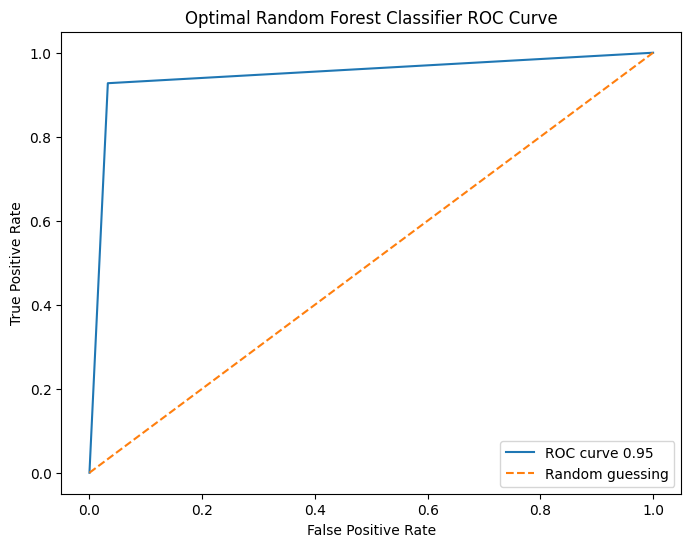

In [ ]:
rf_optimal = RandomForestClassifier(n_estimators=optimal_n_estimator, max_depth=optimal_max_depth, n_jobs=-1)
rf_optimal.fit(X_train, y_train)
y_pred_rf_optimal = rf_optimal.predict(X_test)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_optimal)
roc_auc_rf = metrics.roc_auc_score(y_test, y_pred_rf_optimal)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label="ROC curve %0.2f"% roc_auc_rf)
plt.plot([0, 1], [0, 1], linestyle="--", label="Random guessing")
plt.title("Optimal Random Forest Classifier ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [ ]:
confusion_matrix_rf_optimal = confusion_matrix(y_test, y_pred_rf_optimal)
print("Accuracy of optimal random forest classifier: ", accuracy_score(y_test, y_pred_rf_optimal))
print("Mean squared error (MSE) of optimal random forest classifier: ", mean_squared_error(y_test, y_pred_rf_optimal))
print("Variance score of optimal random forest classifier: ", rf_optimal.score(X_test, y_test))
print("Precision score of optimal random forest classifier: ", precision_score(y_test, y_pred_rf_optimal))
print("Recall value of optimal random forest classifier: ", recall_score(y_test, y_pred_rf_optimal))
print("AUC of optimal random forest classifier: ", roc_auc_rf)
print("Confusion matrix of the optimal random forest classifier: \n", confusion_matrix_rf_optimal)

Accuracy of optimal random forest classifier:  0.9444444444444444
Mean squared error (MSE) of optimal random forest classifier:  0.05555555555555555
Variance score of optimal random forest classifier:  0.9444444444444444
Precision score of optimal random forest classifier:  0.9745762711864406
Recall value of optimal random forest classifier:  0.9274193548387096
AUC of optimal random forest classifier:  0.9474053295932678
Confusion matrix of the optimal random forest classifier: 
 [[ 89   3]
 [  9 115]]


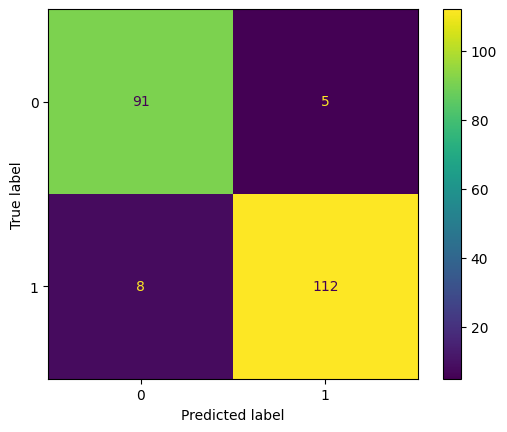

In [ ]:
cfm_rf_optimal = metrics.ConfusionMatrixDisplay(confusion_matrix_rf_optimal, display_labels=None)
cfm_rf_optimal.plot()
plt.show()

1. Feature: Aroma
Mean squared error: 0.19
Variance score: 0.81


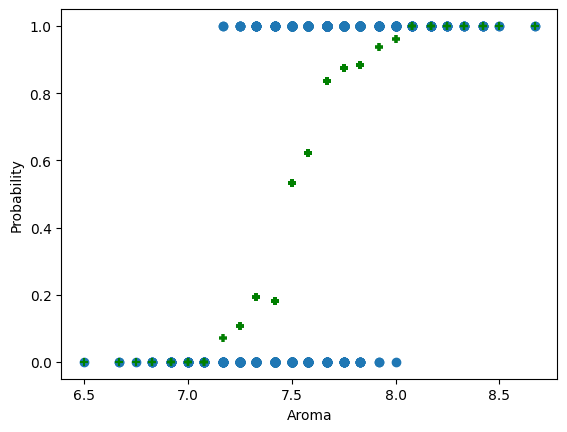

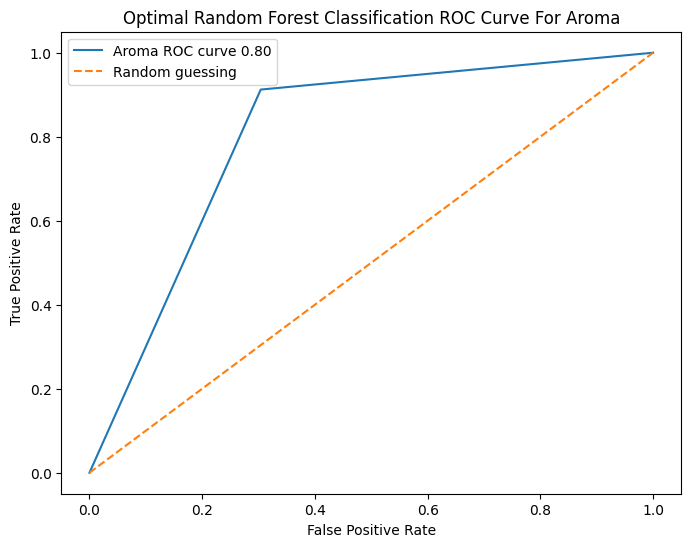

2. Feature: Flavor
Mean squared error: 0.14
Variance score: 0.86


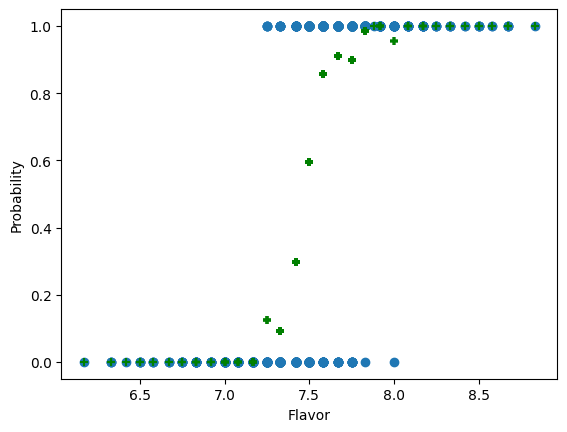

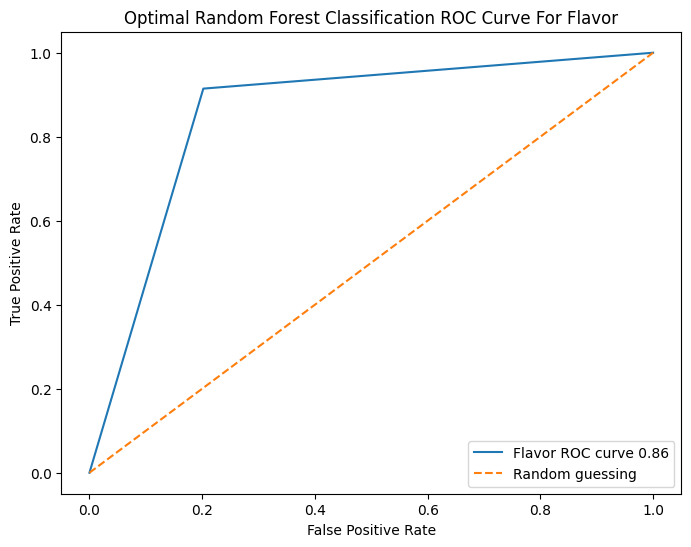

3. Feature: Aftertaste
Mean squared error: 0.19
Variance score: 0.81


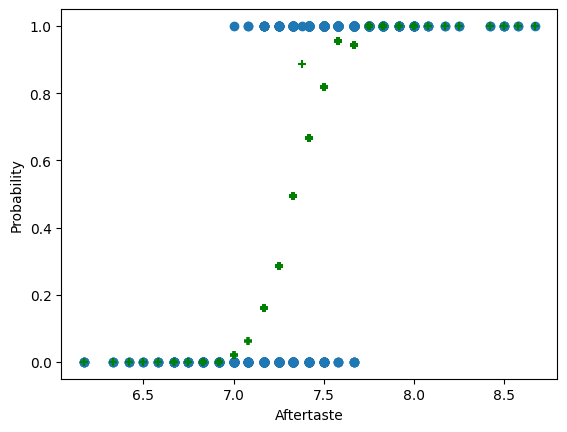

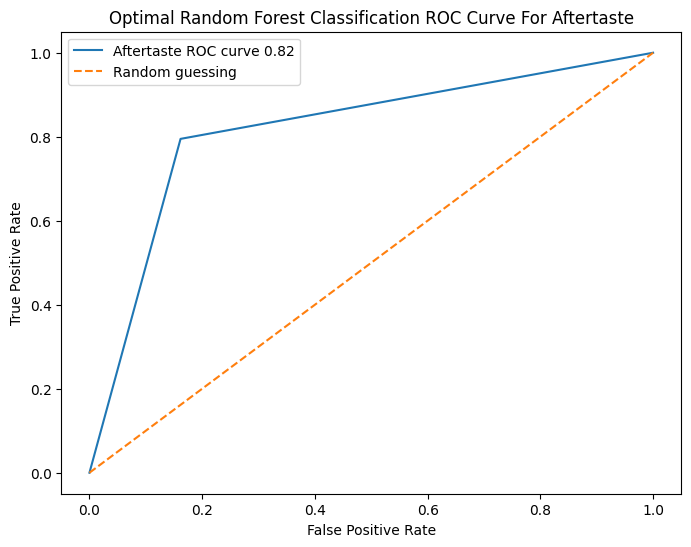

4. Feature: Acidity
Mean squared error: 0.20
Variance score: 0.80


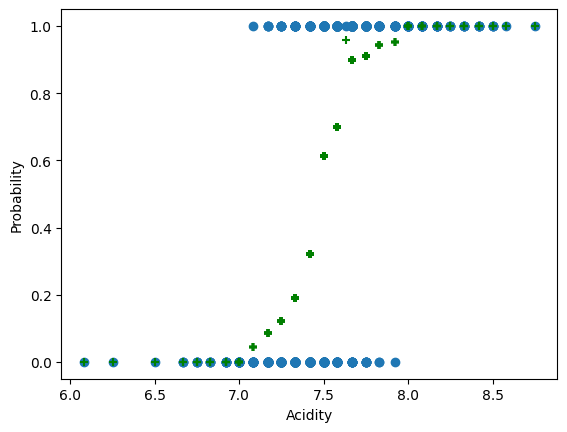

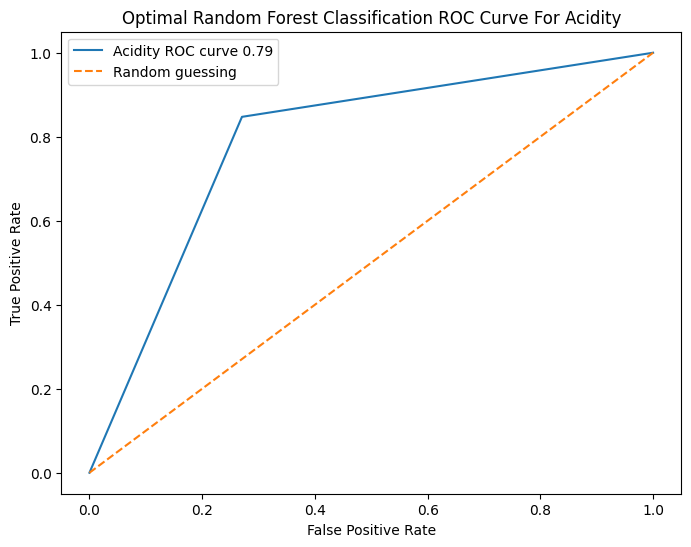

5. Feature: Body
Mean squared error: 0.23
Variance score: 0.77


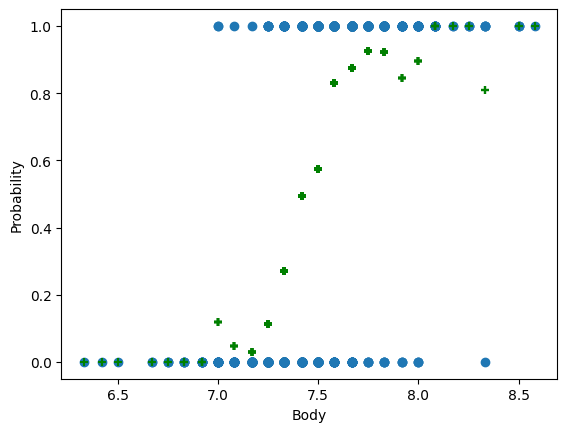

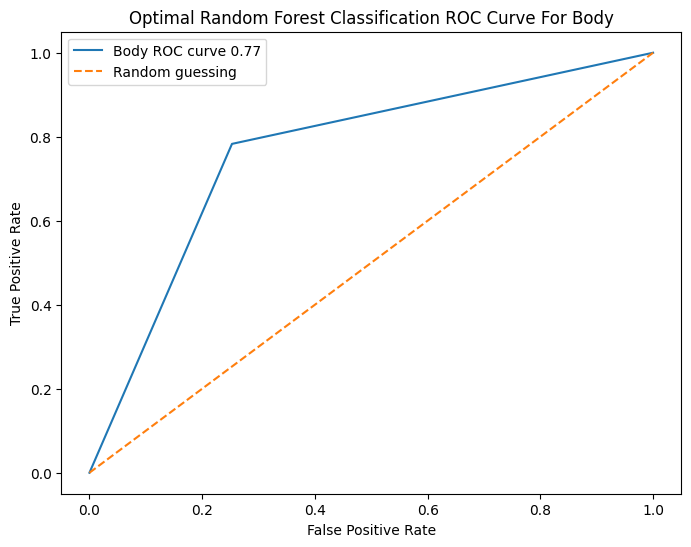

6. Feature: Balance
Mean squared error: 0.16
Variance score: 0.84


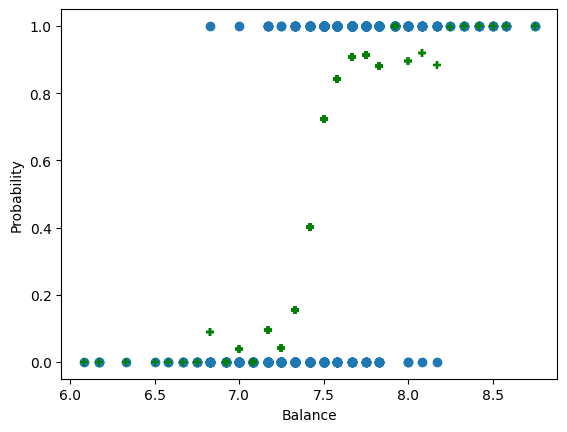

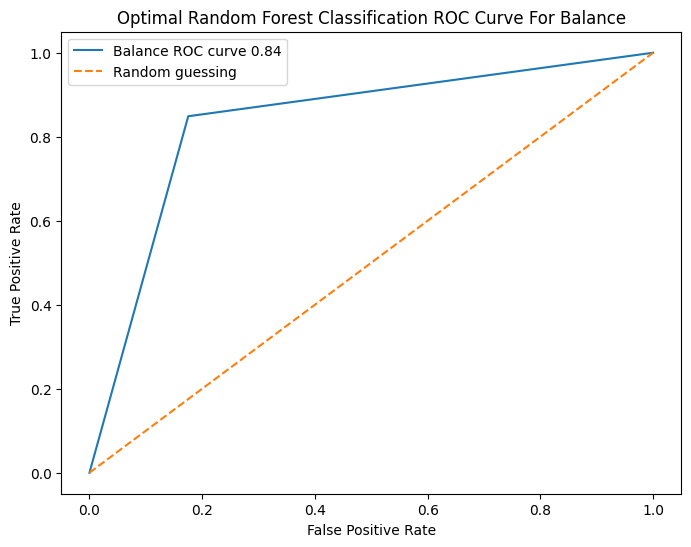

7. Feature: Uniformity
Mean squared error: 0.38
Variance score: 0.62


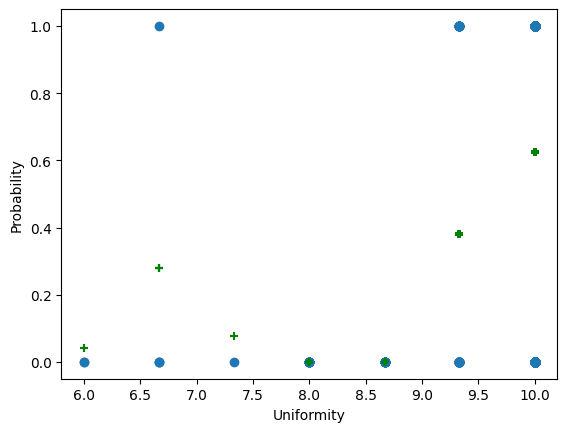

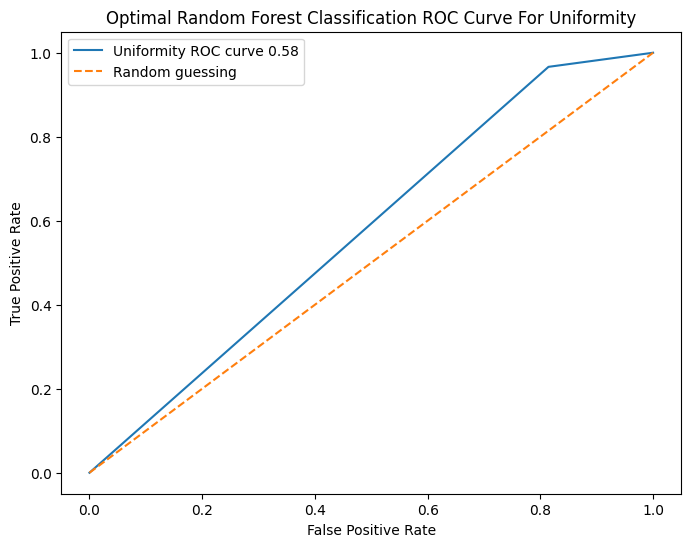

8. Feature: Clean.Cup
Mean squared error: 0.36
Variance score: 0.64


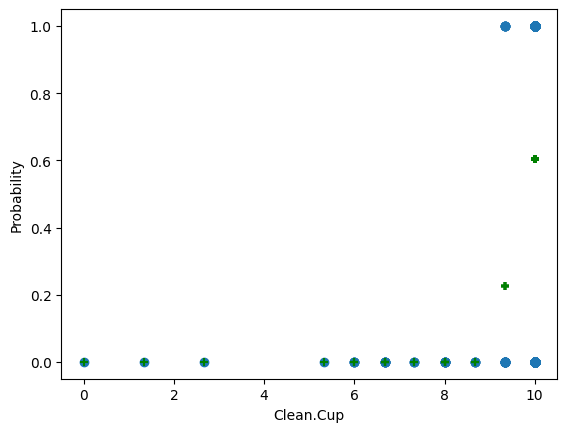

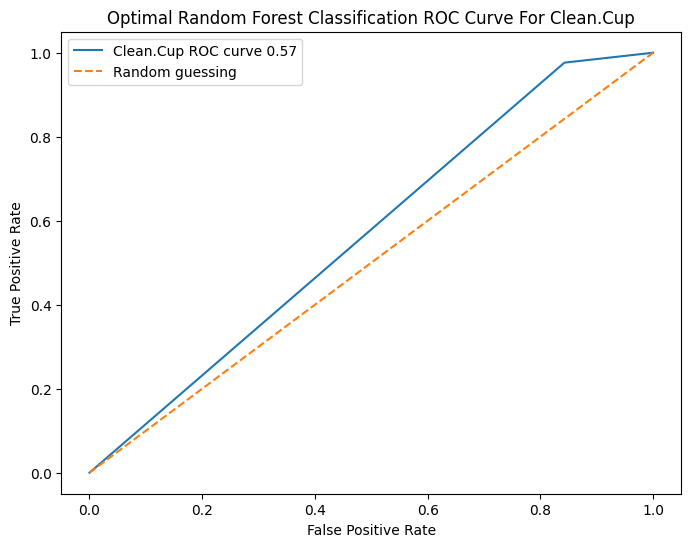

9. Feature: Sweetness
Mean squared error: 0.46
Variance score: 0.54


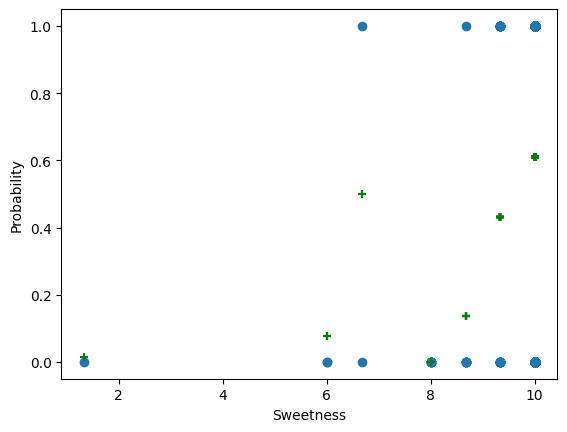

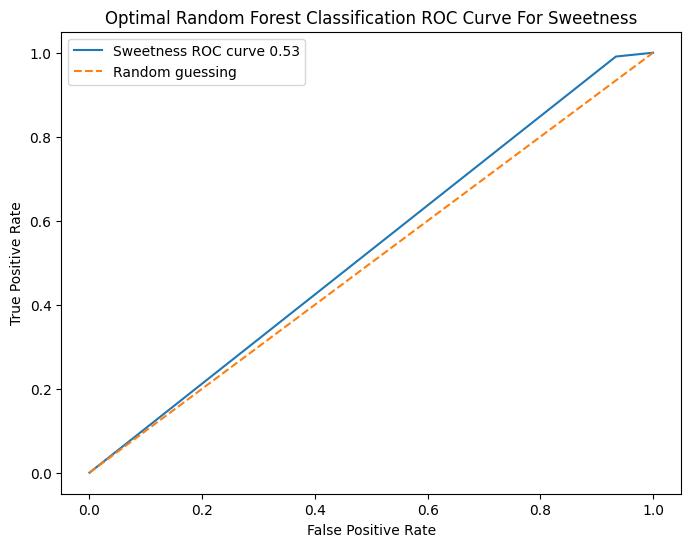

10. Feature: Cupper.Points
Mean squared error: 0.13
Variance score: 0.87


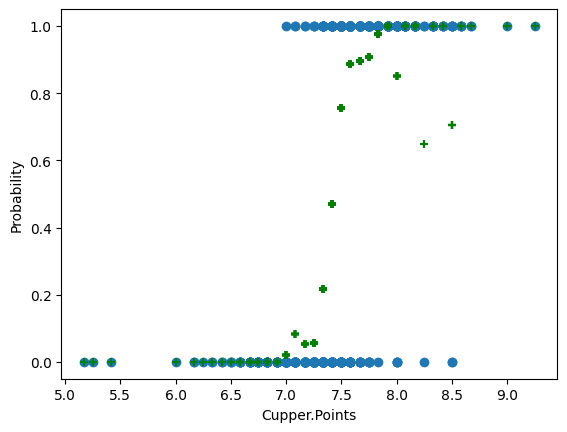

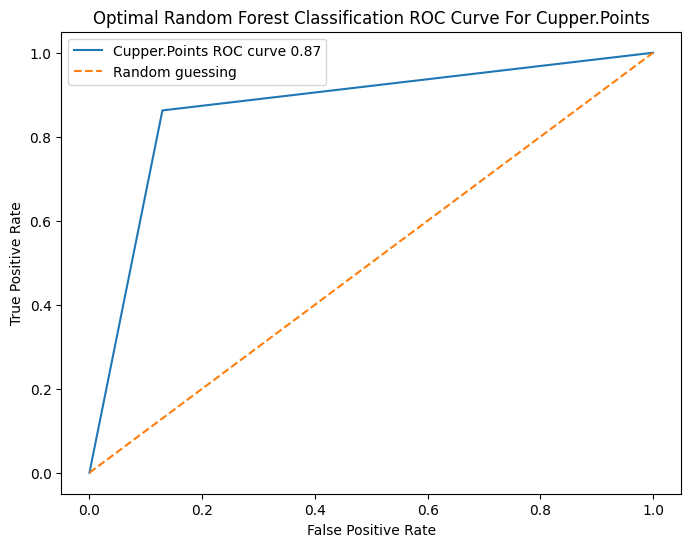

11. Feature: Moisture
Mean squared error: 0.38
Variance score: 0.62


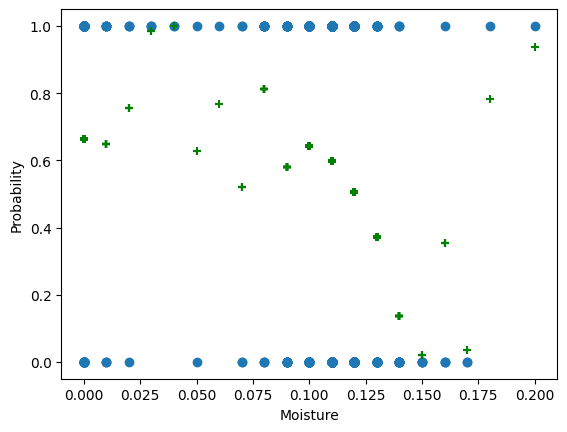

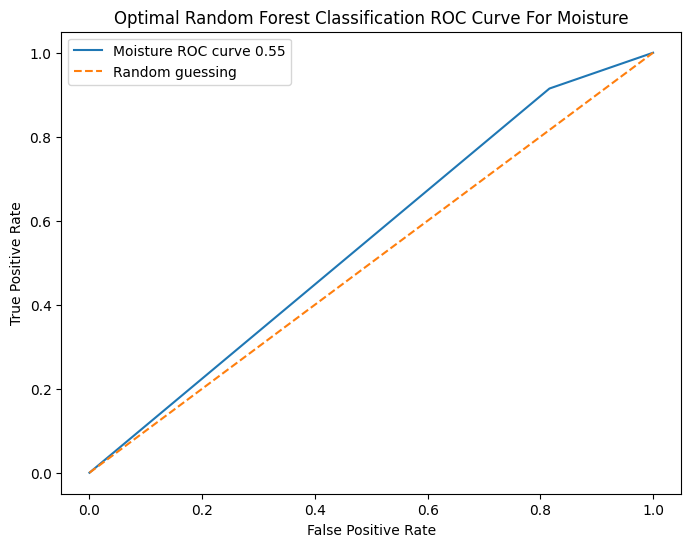

12. Feature: Quakers
Mean squared error: 0.39
Variance score: 0.61


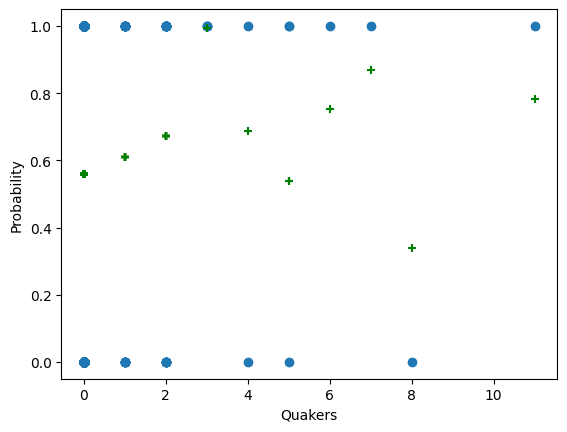

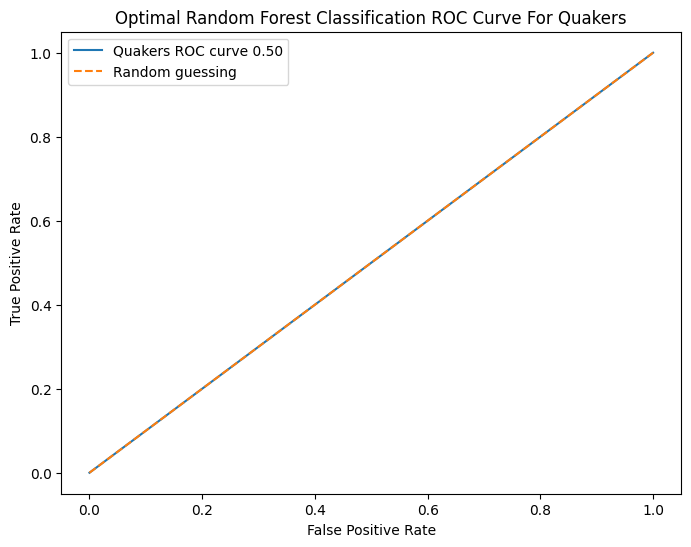

13. Feature: Category.One.Defects
Mean squared error: 0.40
Variance score: 0.60


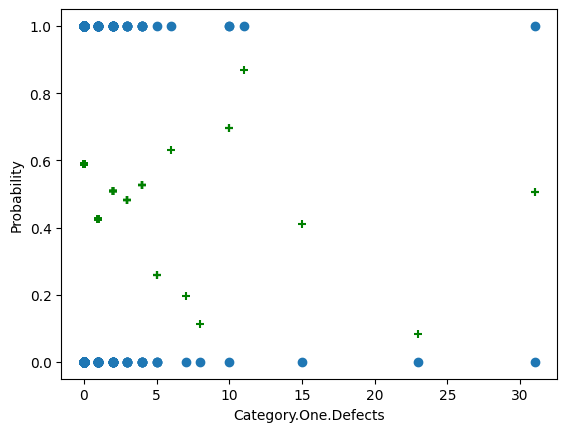

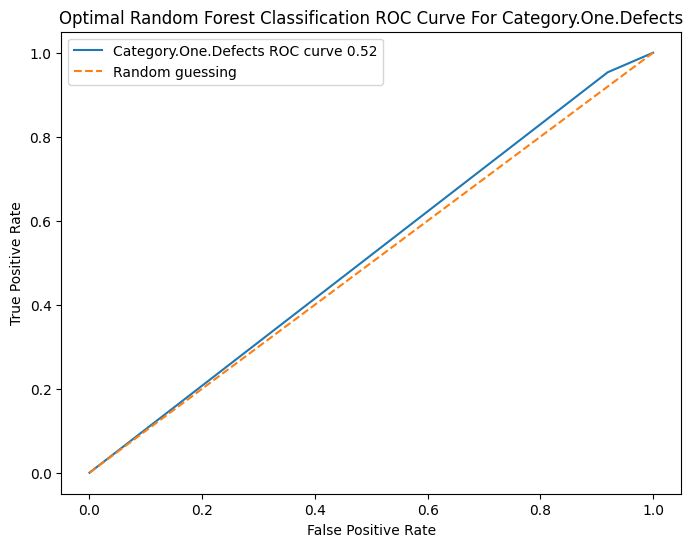

14. Feature: Category.Two.Defects
Mean squared error: 0.39
Variance score: 0.61


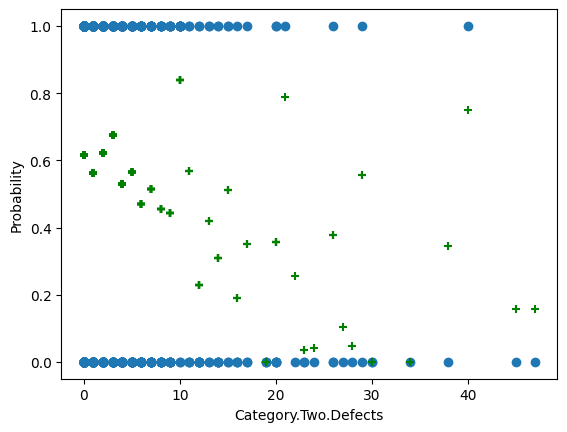

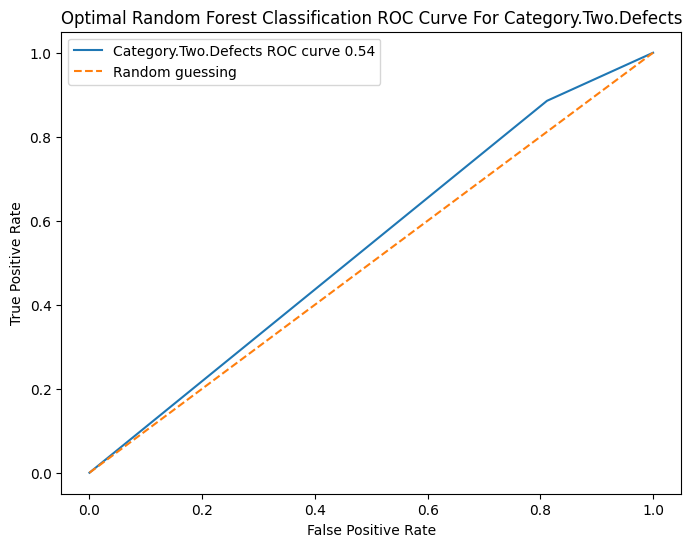

15. Feature: altitude_mean_meters
Mean squared error: 0.44
Variance score: 0.56


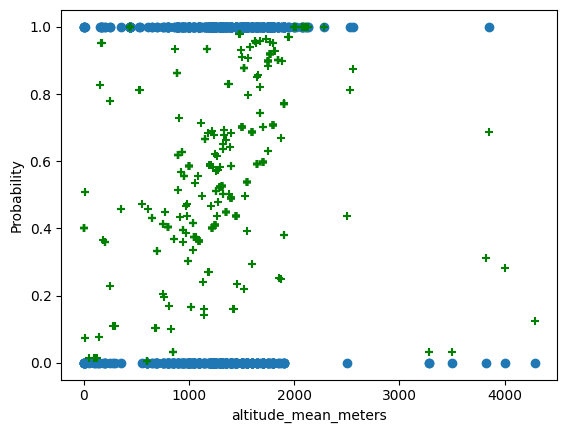

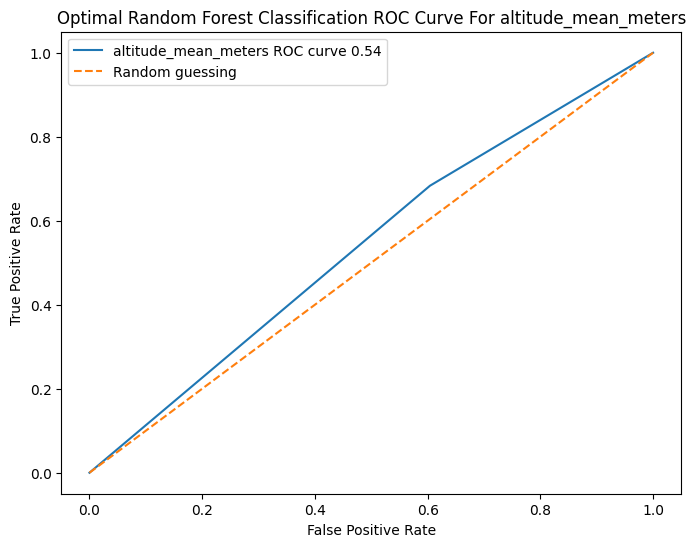

In [ ]:
AUC_features_rf = []
MSE_features_rf = []
VAR_features_rf = []
for i in range(15):
    X_1 = pd.DataFrame(df[col_names[i]])
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, binary_y, test_size=0.2)
    rf_optimal.fit(X_train_1, y_train_1)
    y_pred_rf_1 =rf_optimal.predict(X_test_1)
    
    print(str(i+1) + '. Feature: ' + col_names[i])
    print("Mean squared error: %.2f" % mean_squared_error(y_test_1, y_pred_rf_1))
    print('Variance score: %.2f' % rf_optimal.score(X_test_1,y_test_1))
    MSE_features_rf.append(mean_squared_error(y_test_1, y_pred_rf_1))
    VAR_features_rf.append(rf_optimal.score(X_test_1,y_test_1))
    
    plt.scatter(X_train_1, y_train_1)
    plt.scatter(X_train_1, rf_optimal.predict_proba(X_train_1)[:,1], color="green", marker="+")
    plt.xlabel(col_names[i])
    plt.ylabel("Probability")
    plt.show()
    
    fpr_1, tpr_1, _ = roc_curve(y_test_1, y_pred_rf_1, pos_label=None, sample_weight=None, drop_intermediate=True)
    roc_auc_1 = metrics.roc_auc_score(y_test_1, y_pred_rf_1)
    AUC_features_rf.append(roc_auc_1)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_1, tpr_1, label=col_names[i] + " ROC curve %0.2f"% roc_auc_1)
    plt.plot([0, 1], [0, 1], linestyle="--", label="Random guessing")
    plt.title("Optimal Random Forest Classification ROC Curve For " + col_names[i])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

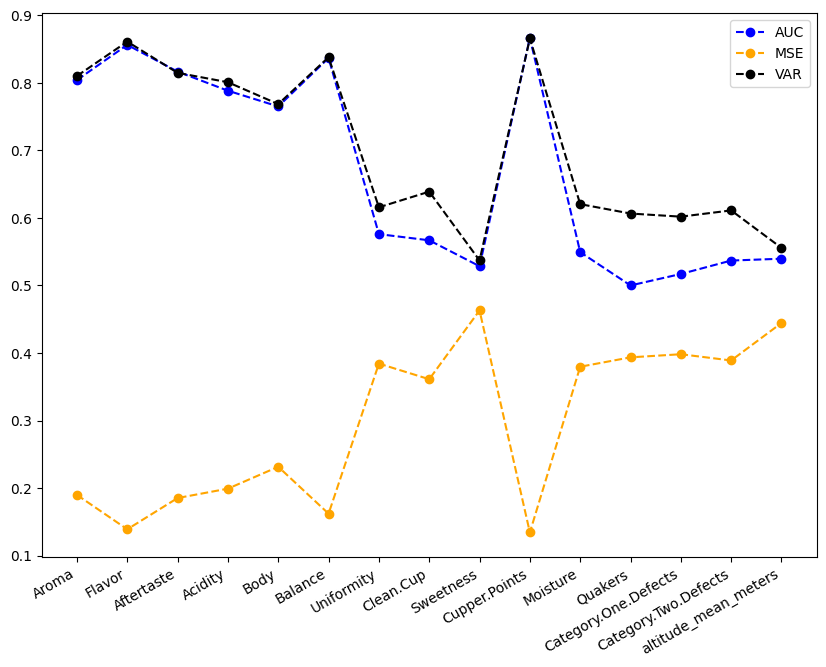

In [ ]:
# Plot AUC based on each feature
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(feature_names, AUC_features_rf, color='blue', marker='o', linestyle='--', label="AUC")
plt.plot(feature_names, MSE_features_rf, color='orange', marker='o', linestyle='--', label="MSE")
plt.plot(feature_names, VAR_features_rf, color='black', marker='o', linestyle='--', label="VAR")

plt.legend()
fig.autofmt_xdate()
plt.show()

## K Nearest Neighbour Classification

In [ ]:
# K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix,roc_curve,classification_report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Text(0, 0.5, 'Mean Error')

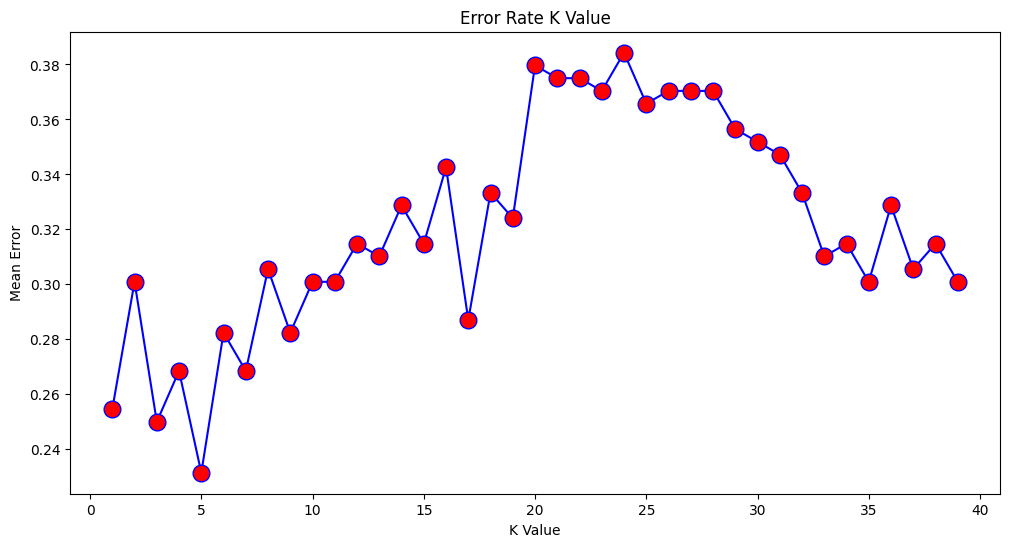

In [ ]:
# Calculating error for K values between 1 and 40

errorRate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    errorRate.append(np.mean(pred_i != y_test))


plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), errorRate, color='blue', marker='o',
         markerfacecolor='red', markersize = 12)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Model test Score: 0.769,  Model training Score: 0.830
Mean squared error: 0.23
Variance score: 0.77
Accuracy :  0.7685185185185185
Precision :  0.819672131147541
Recall:   0.78125
Classification Report :
               precision    recall  f1-score   support

           0       0.70      0.75      0.73        88
           1       0.82      0.78      0.80       128

    accuracy                           0.77       216
   macro avg       0.76      0.77      0.76       216
weighted avg       0.77      0.77      0.77       216

Confusion Matrix :
 [[ 66  22]
 [ 28 100]]

Roc curve: 


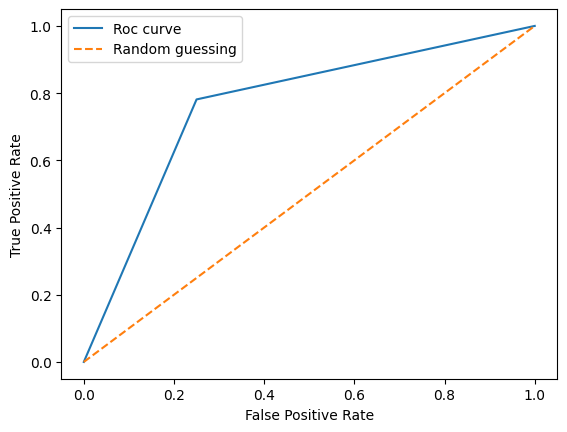


AUC:  0.765625


Precision/Recall curve: 


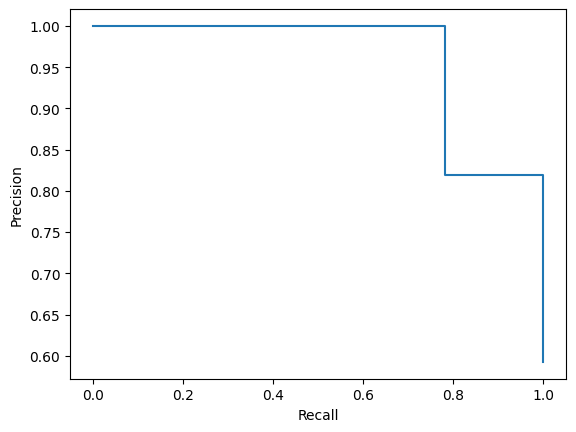

In [ ]:
# fit into model

from scipy import stats

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


print('Model test Score: %.3f, ' %knn.score(X_test, y_test),
      'Model training Score: %.3f' %knn.score(X_train, y_train))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_knn))
print("Variance score: %.2f" % knn.score(X_test , y_test))

y_train_pred = knn.predict(X_train)

print('Accuracy : ', accuracy_score(y_test, y_pred_knn))
print('Precision : ', precision_score(y_test, y_pred_knn))
print('Recall:  ', recall_score(y_test, y_pred_knn))
print('Classification Report :\n', classification_report(y_test, y_pred_knn))
print('Confusion Matrix :\n', confusion_matrix(y_test, y_pred_knn))

fpr, tpr, thr1 = roc_curve(y_test, y_pred_knn)
pre, rec, thr2 = precision_recall_curve(y_test, y_pred_knn)
roc_auc = metrics.roc_auc_score(y_test, y_pred_knn)

print("\nRoc curve: ")
plt.plot(fpr, tpr, label="Roc curve")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random guessing")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print("\nAUC: ", roc_auc)

print("\n\nPrecision/Recall curve: ")
plt.step(rec, pre)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

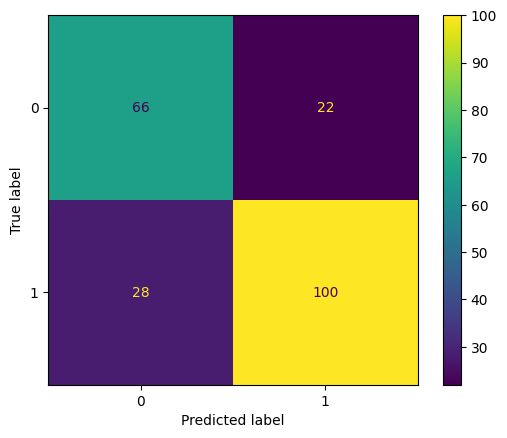

In [ ]:
cfm = metrics.ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn), display_labels=None)
cfm.plot()
plt.show()

Feature: Aroma
Model test Score: 0.764,  Model training Score: 0.769
Mean squared error: 0.24
Variance score: 0.76
Accuracy :  0.7638888888888888
AUC:  0.765625
Roc curve: 


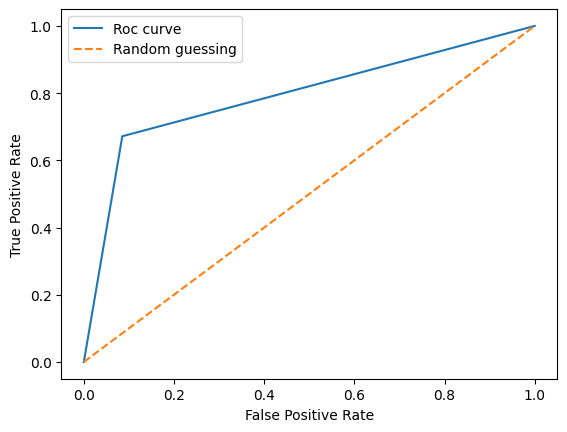

Feature: Flavor
Model test Score: 0.843,  Model training Score: 0.845
Mean squared error: 0.16
Variance score: 0.84
Accuracy :  0.8425925925925926
AUC:  0.7931379686931198
Roc curve: 


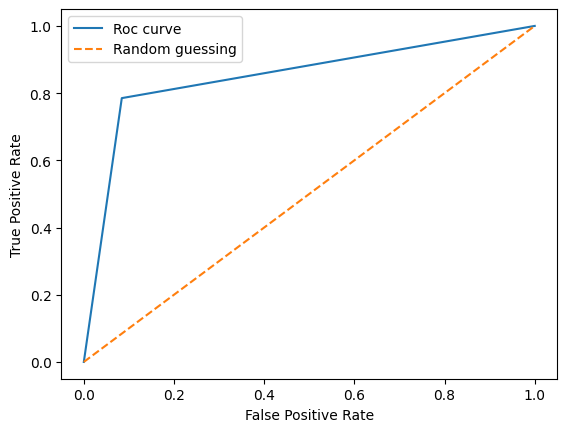

Feature: Aftertaste
Model test Score: 0.819,  Model training Score: 0.842
Mean squared error: 0.18
Variance score: 0.82
Accuracy :  0.8194444444444444
AUC:  0.8504567203131796
Roc curve: 


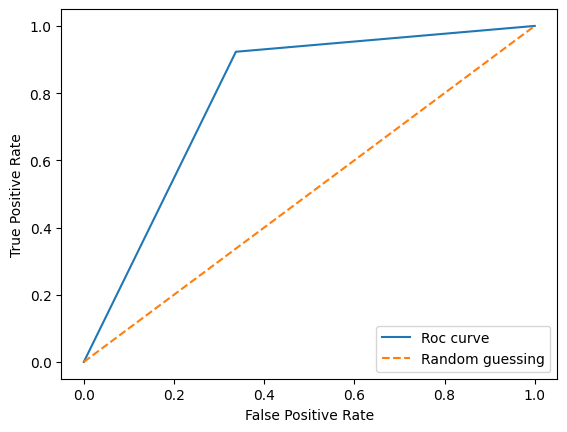

Feature: Acidity
Model test Score: 0.796,  Model training Score: 0.824
Mean squared error: 0.20
Variance score: 0.80
Accuracy :  0.7962962962962963
AUC:  0.7929338103756709
Roc curve: 


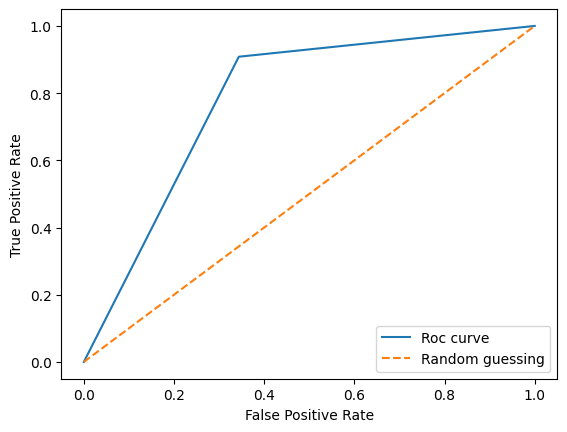

Feature: Body
Model test Score: 0.792,  Model training Score: 0.786
Mean squared error: 0.21
Variance score: 0.79
Accuracy :  0.7916666666666666
AUC:  0.7822916666666666
Roc curve: 


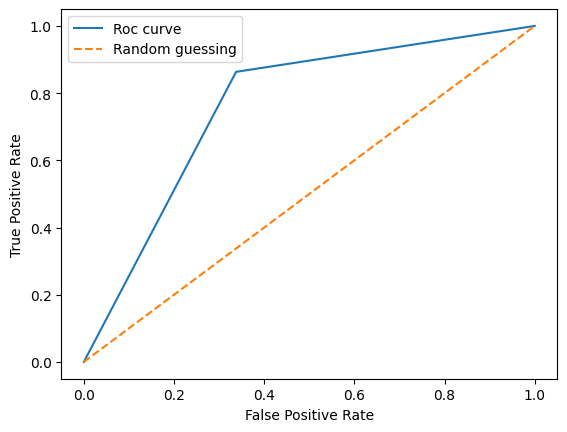

Feature: Balance
Model test Score: 0.718,  Model training Score: 0.760
Mean squared error: 0.28
Variance score: 0.72
Accuracy :  0.7175925925925926
AUC:  0.762823507427824
Roc curve: 


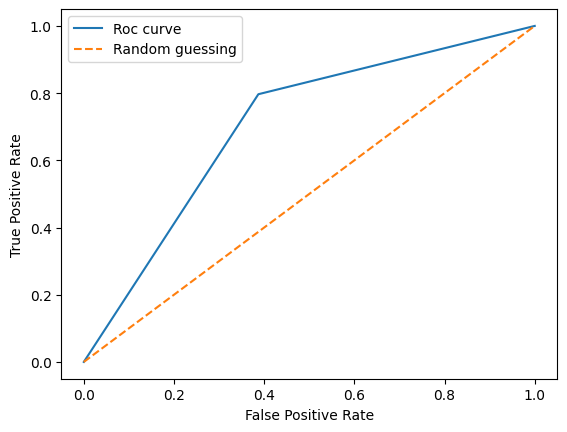

Feature: Uniformity
Model test Score: 0.458,  Model training Score: 0.417
Mean squared error: 0.54
Variance score: 0.46
Accuracy :  0.4583333333333333
AUC:  0.7048255966430632
Roc curve: 


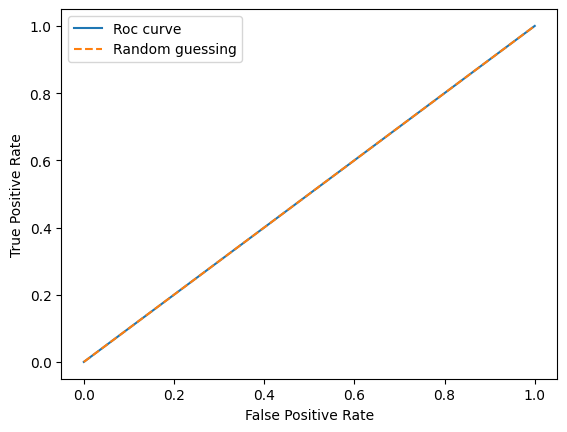

Feature: Clean.Cup
Model test Score: 0.625,  Model training Score: 0.628
Mean squared error: 0.38
Variance score: 0.62
Accuracy :  0.625
AUC:  0.5
Roc curve: 


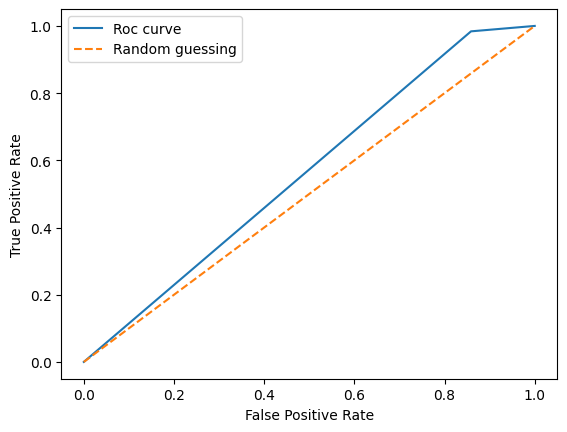

Feature: Sweetness
Model test Score: 0.625,  Model training Score: 0.589
Mean squared error: 0.38
Variance score: 0.62
Accuracy :  0.625
AUC:  0.5625876577840112
Roc curve: 


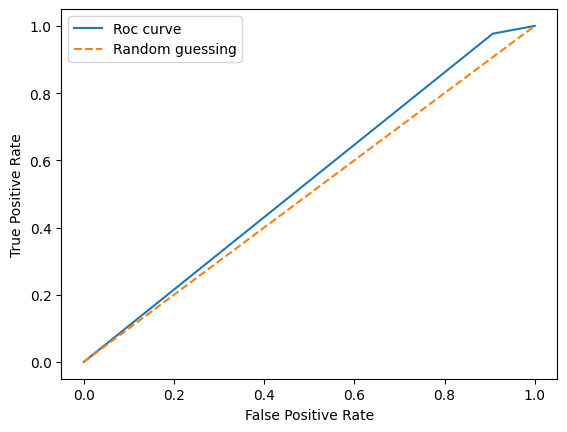

Feature: Cupper.Points
Model test Score: 0.796,  Model training Score: 0.800
Mean squared error: 0.20
Variance score: 0.80
Accuracy :  0.7962962962962963
AUC:  0.5349731663685152
Roc curve: 


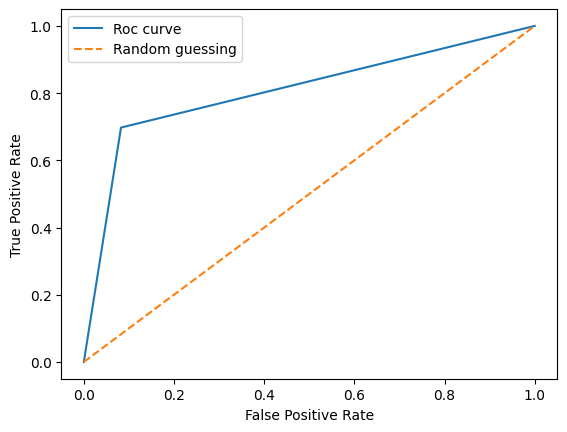

Feature: Moisture
Model test Score: 0.574,  Model training Score: 0.542
Mean squared error: 0.43
Variance score: 0.57
Accuracy :  0.5740740740740741
AUC:  0.8075023823962574
Roc curve: 


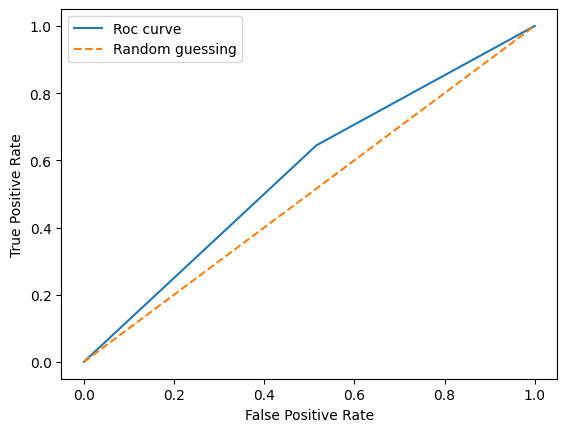

Feature: Quakers
Model test Score: 0.407,  Model training Score: 0.458
Mean squared error: 0.59
Variance score: 0.41
Accuracy :  0.4074074074074074
AUC:  0.5644193127446716
Roc curve: 


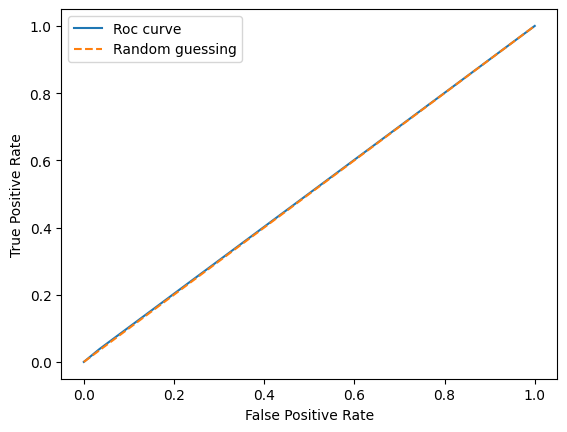

Feature: Category.One.Defects
Model test Score: 0.463,  Model training Score: 0.416
Mean squared error: 0.54
Variance score: 0.46
Accuracy :  0.46296296296296297
AUC:  0.5017889087656531
Roc curve: 


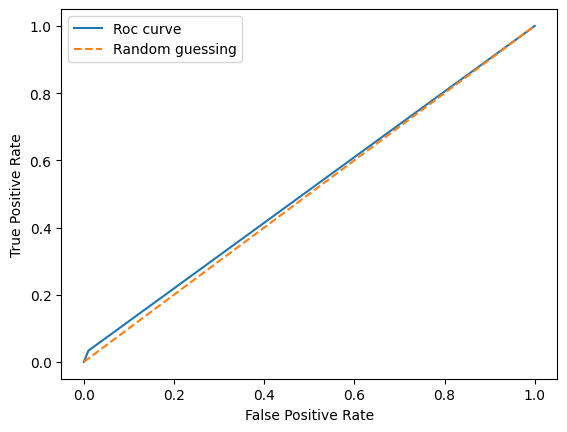

Feature: Category.Two.Defects
Model test Score: 0.546,  Model training Score: 0.542
Mean squared error: 0.45
Variance score: 0.55
Accuracy :  0.5462962962962963
AUC:  0.511652083513818
Roc curve: 


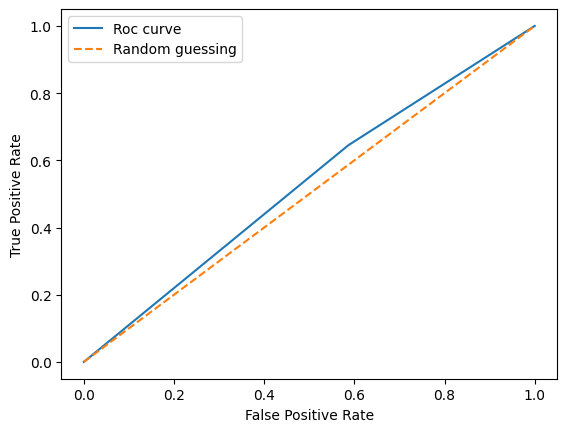

Feature: altitude_mean_meters
Model test Score: 0.500,  Model training Score: 0.600
Mean squared error: 0.50
Variance score: 0.50
Accuracy :  0.5
AUC:  0.5291023842917251
Roc curve: 


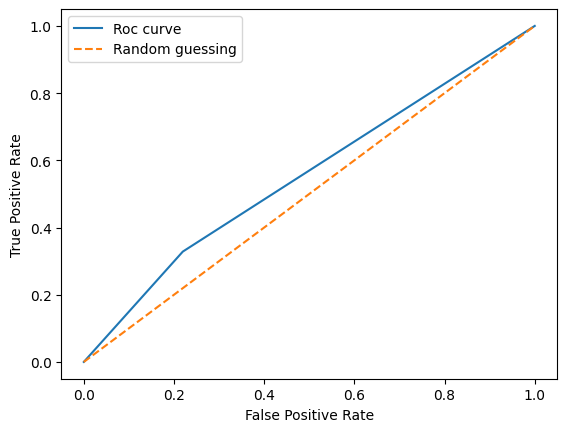

In [ ]:
AUC = []

for i in range(15):
  Xi = pd.DataFrame(df[col_names[i]])
  Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, binary_y, test_size=0.2)
  knn = KNeighborsClassifier(n_neighbors = 4)
  knn.fit(Xi_train, yi_train)
  yi_pred_knn = knn.predict(Xi_test)
  yi_train_pred = knn.predict(Xi_train)
  print("Feature: " + col_names[i])
  print('Model test Score: %.3f, ' %knn.score(Xi_test, yi_test),
      'Model training Score: %.3f' %knn.score(Xi_train, yi_train))
  print("Mean squared error: %.2f" % mean_squared_error(yi_test, yi_pred_knn))
  print("Variance score: %.2f" % knn.score(Xi_test , yi_test))
  print('Accuracy : ', accuracy_score(yi_test, yi_pred_knn))
  print("AUC: ", roc_auc)
  fpr, tpr, thr1 = roc_curve(yi_test, yi_pred_knn)
  pre, rec, thr2 = precision_recall_curve(yi_test, yi_pred_knn)
  roc_auc = metrics.roc_auc_score(yi_test, yi_pred_knn)
  AUC.append(roc_auc)
  print("Roc curve: ")
  plt.plot(fpr, tpr, label="Roc curve")
  plt.plot([0, 1], [0, 1], linestyle="--", label="Random guessing")
  plt.legend()
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()

<ipython-input-15-8c6b0905b6d6>:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(feature_names, AUC, color='blue', marker='o', linestyle='--', markerfacecolor='orange')


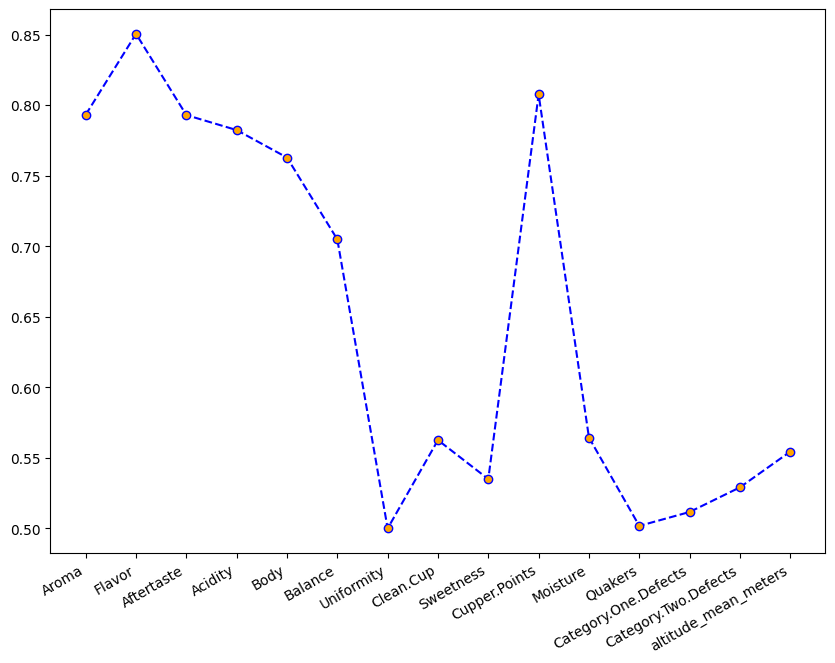

In [ ]:
# plot AUC

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot_date(feature_names, AUC, color='blue', marker='o', linestyle='--', markerfacecolor='orange')

fig.autofmt_xdate()
plt.show()